In [16]:
#This code imports the necessary libraries for data analysis and visualization: 
#Pandas, NumPy, Seaborn, and Matplotlib. 
#The "%matplotlib inline" command allows for inline plotting

%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltimport
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from plotly.offline import iplot
#import cufflinks as cf
#cf.go_offline()
import plotly.graph_objects as go
fig = go.Figure()
#from wordcloud import WordCloud
import plotly.express as px 
%matplotlib inline

In [17]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install plotly==5.3.1


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from plotly.offline import iplot

In [20]:
#load the data
data = pd.read_csv("C:/Users/ARCHANA/Downloads/Movies_on_Netflix__Prime_Video__Hulu_and_Disney__1579_91 (2).csv")
data

Unnamed: 0      X     ID                           Title  Year  Age  \
0               1      0      1                       Inception  2010  13+   
1               2      1      2                      The Matrix  1999  18+   
2               3      2      3          Avengers: Infinity War  2018  13+   
3               4      3      4              Back to the Future  1985   7+   
4               5      4      5  The Good, the Bad and the Ugly  1966  18+   
...           ...    ...    ...                             ...   ...  ...   
15814       16735  16734  16735        Sultan And The Rock Star  1980  NaN   
15815       16738  16737  16738                 The Bears and I  1974  all   
15816       16739  16738  16739    Whispers: An Elephant's Tale  2000  all   
15817       16740  16739  16740       The Ghosts of Buxley Hall  1980  NaN   
15818       16741  16740  16741                  The Poof Point  2001   7+   

       IMDb Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0       8.8             87%        1     0            0        0     0   
1       8.7             87%        1     0            0        0     0   
2       8.5             84%        1     0            0        0     0   
3       8.5             96%        1     0            0        0     0   
4       8.8             97%        1     0            1        0     0   
...     ...             ...      ...   ...          ...      ...   ...   
15814   5.9             NaN        0     0            0        1     0   
15815   6.2             NaN        0     0            0        1     0   
15816   5.0             NaN        0     0            0        1     0   
15817   6.2             NaN        0     0            0        1     0   
15818   4.7             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 18 columns]

In [21]:
#returns the number of elements in the data object
len(data)


15819

In [22]:
#Displays column names in a pandas DataFrame object
data.columns


Index(['Unnamed: 0', 'X', 'ID', 'Title', 'Year', 'Age', 'IMDb',
       'Rotten.Tomatoes', 'Netflix', 'Hulu', 'Prime.Video', 'Disney.', 'Type',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [23]:
#Summary statistics for each column in DataFrame.
data.describe()

Unnamed: 0             X            ID          Year          IMDb  \
count  15819.000000  15819.000000  15819.000000  15819.000000  15819.000000   
mean    8235.393514   8234.393514   8235.393514   2002.527404      5.904109   
std     4747.752619   4747.752619   4747.752619     20.970346      1.346653   
min        1.000000      0.000000      1.000000   1902.000000      0.000000   
25%     4226.500000   4225.500000   4226.500000   1999.000000      5.100000   
50%     8240.000000   8239.000000   8240.000000   2012.000000      6.100000   
75%    12297.500000  12296.500000  12297.500000   2016.000000      6.900000   
max    16741.000000  16740.000000  16741.000000   2020.000000      9.300000   

            Netflix          Hulu   Prime.Video       Disney.     Type  \
count  15819.000000  15819.000000  15819.000000  15819.000000  15819.0   
mean       0.208357      0.055566      0.740375      0.035021      0.0   
std        0.406146      0.229089      0.438442      0.183839      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      1.000000      0.000000      0.0   
75%        0.000000      0.000000      1.000000      0.000000      0.0   
max        1.000000      1.000000      1.000000      1.000000      0.0   

            Runtime  
count  15819.000000  
mean      93.771604  
std       27.953764  
min        1.000000  
25%       83.000000  
50%       92.000000  
75%      104.000000  
max     1256.000000

In [24]:
#Displays summary information about a DataFrame's columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15819 non-null  int64  
 1   X                15819 non-null  int64  
 2   ID               15819 non-null  int64  
 3   Title            15819 non-null  object 
 4   Year             15819 non-null  int64  
 5   Age              7234 non-null   object 
 6   IMDb             15819 non-null  float64
 7   Rotten.Tomatoes  5120 non-null   object 
 8   Netflix          15819 non-null  int64  
 9   Hulu             15819 non-null  int64  
 10  Prime.Video      15819 non-null  int64  
 11  Disney.          15819 non-null  int64  
 12  Type             15819 non-null  int64  
 13  Directors        15487 non-null  object 
 14  Genres           15795 non-null  object 
 15  Country          15707 non-null  object 
 16  Language         15583 non-null  object 
 17  Runtime     

## Data Cleaning

In [25]:
#Looking for duplicate values
print(data.duplicated().sum())

0


In [26]:
#Looking for redundant columns
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

Unnamed: 0: 15819
X: 15819
ID: 15819
Title: 15819
Year: 109
Age: 5
IMDb: 82
Rotten.Tomatoes: 99
Netflix: 2
Hulu: 2
Prime.Video: 2
Disney.: 2
Type: 1
Directors: 10964
Genres: 1868
Country: 1274
Language: 1082
Runtime: 224


In [27]:
#Redundant column 
red_col=data.T.duplicated().sum
red_col

<bound method NDFrame._add_numeric_operations.<locals>.sum of Unnamed: 0         False
X                  False
ID                  True
Title              False
Year               False
Age                False
IMDb               False
Rotten.Tomatoes    False
Netflix            False
Hulu               False
Prime.Video        False
Disney.            False
Type               False
Directors          False
Genres             False
Country            False
Language           False
Runtime            False
dtype: bool>

In [28]:
# Removing the redundant column
data = data.drop('ID', axis=1)
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010  13+   8.8   
1               2      1                      The Matrix  1999  18+   8.7   
2               3      2          Avengers: Infinity War  2018  13+   8.5   
3               4      3              Back to the Future  1985   7+   8.5   
4               5      4  The Good, the Bad and the Ugly  1966  18+   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980  NaN   5.9   
15815       16738  16737                 The Bears and I  1974  all   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000  all   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980  NaN   6.2   
15818       16741  16740                  The Poof Point  2001   7+   4.7   

      Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                 87%        1     0            0        0     0   
1                 87%        1     0            0        0     0   
2                 84%        1     0            0        0     0   
3                 96%        1     0            0        0     0   
4                 97%        1     0            1        0     0   
...               ...      ...   ...          ...      ...   ...   
15814             NaN        0     0            0        1     0   
15815             NaN        0     0            0        1     0   
15816             NaN        0     0            0        1     0   
15817             NaN        0     0            0        1     0   
15818             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [29]:
#Looking for null values
data.isnull().sum()

Unnamed: 0             0
X                      0
Title                  0
Year                   0
Age                 8585
IMDb                   0
Rotten.Tomatoes    10699
Netflix                0
Hulu                   0
Prime.Video            0
Disney.                0
Type                   0
Directors            332
Genres                24
Country              112
Language             236
Runtime                0
dtype: int64

In [30]:
# replace the word "ALL" with 0 in column 'Age'
data['Age'] = data['Age'].replace('all', 0)
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010  13+   8.8   
1               2      1                      The Matrix  1999  18+   8.7   
2               3      2          Avengers: Infinity War  2018  13+   8.5   
3               4      3              Back to the Future  1985   7+   8.5   
4               5      4  The Good, the Bad and the Ugly  1966  18+   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980  NaN   5.9   
15815       16738  16737                 The Bears and I  1974    0   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000    0   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980  NaN   6.2   
15818       16741  16740                  The Poof Point  2001   7+   4.7   

      Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                 87%        1     0            0        0     0   
1                 87%        1     0            0        0     0   
2                 84%        1     0            0        0     0   
3                 96%        1     0            0        0     0   
4                 97%        1     0            1        0     0   
...               ...      ...   ...          ...      ...   ...   
15814             NaN        0     0            0        1     0   
15815             NaN        0     0            0        1     0   
15816             NaN        0     0            0        1     0   
15817             NaN        0     0            0        1     0   
15818             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [31]:
#Removing the '+' sign from Age column
data['Age'] = data['Age'].str.rstrip('+').astype('float')
data

Unnamed: 0      X                           Title  Year   Age  IMDb  \
0               1      0                       Inception  2010  13.0   8.8   
1               2      1                      The Matrix  1999  18.0   8.7   
2               3      2          Avengers: Infinity War  2018  13.0   8.5   
3               4      3              Back to the Future  1985   7.0   8.5   
4               5      4  The Good, the Bad and the Ugly  1966  18.0   8.8   
...           ...    ...                             ...   ...   ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980   NaN   5.9   
15815       16738  16737                 The Bears and I  1974   NaN   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000   NaN   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980   NaN   6.2   
15818       16741  16740                  The Poof Point  2001   7.0   4.7   

      Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                 87%        1     0            0        0     0   
1                 87%        1     0            0        0     0   
2                 84%        1     0            0        0     0   
3                 96%        1     0            0        0     0   
4                 97%        1     0            1        0     0   
...               ...      ...   ...          ...      ...   ...   
15814             NaN        0     0            0        1     0   
15815             NaN        0     0            0        1     0   
15816             NaN        0     0            0        1     0   
15817             NaN        0     0            0        1     0   
15818             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [32]:
# Replace 0 with NaN
data['Age'] = data['Age'].replace(0, np.nan)
data['Age'] = data['Age'].fillna(data['Age'].mean())
data

Unnamed: 0      X                           Title  Year        Age  \
0               1      0                       Inception  2010  13.000000   
1               2      1                      The Matrix  1999  18.000000   
2               3      2          Avengers: Infinity War  2018  13.000000   
3               4      3              Back to the Future  1985   7.000000   
4               5      4  The Good, the Bad and the Ugly  1966  18.000000   
...           ...    ...                             ...   ...        ...   
15814       16735  16734        Sultan And The Rock Star  1980  14.474587   
15815       16738  16737                 The Bears and I  1974  14.474587   
15816       16739  16738    Whispers: An Elephant's Tale  2000  14.474587   
15817       16740  16739       The Ghosts of Buxley Hall  1980  14.474587   
15818       16741  16740                  The Poof Point  2001   7.000000   

       IMDb Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0       8.8             87%        1     0            0        0     0   
1       8.7             87%        1     0            0        0     0   
2       8.5             84%        1     0            0        0     0   
3       8.5             96%        1     0            0        0     0   
4       8.8             97%        1     0            1        0     0   
...     ...             ...      ...   ...          ...      ...   ...   
15814   5.9             NaN        0     0            0        1     0   
15815   6.2             NaN        0     0            0        1     0   
15816   5.0             NaN        0     0            0        1     0   
15817   6.2             NaN        0     0            0        1     0   
15818   4.7             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [33]:
#Filling missing values in the Age column with '0'
data['Age'] = data['Age'].fillna(0)
data

Unnamed: 0      X                           Title  Year        Age  \
0               1      0                       Inception  2010  13.000000   
1               2      1                      The Matrix  1999  18.000000   
2               3      2          Avengers: Infinity War  2018  13.000000   
3               4      3              Back to the Future  1985   7.000000   
4               5      4  The Good, the Bad and the Ugly  1966  18.000000   
...           ...    ...                             ...   ...        ...   
15814       16735  16734        Sultan And The Rock Star  1980  14.474587   
15815       16738  16737                 The Bears and I  1974  14.474587   
15816       16739  16738    Whispers: An Elephant's Tale  2000  14.474587   
15817       16740  16739       The Ghosts of Buxley Hall  1980  14.474587   
15818       16741  16740                  The Poof Point  2001   7.000000   

       IMDb Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0       8.8             87%        1     0            0        0     0   
1       8.7             87%        1     0            0        0     0   
2       8.5             84%        1     0            0        0     0   
3       8.5             96%        1     0            0        0     0   
4       8.8             97%        1     0            1        0     0   
...     ...             ...      ...   ...          ...      ...   ...   
15814   5.9             NaN        0     0            0        1     0   
15815   6.2             NaN        0     0            0        1     0   
15816   5.0             NaN        0     0            0        1     0   
15817   6.2             NaN        0     0            0        1     0   
15818   4.7             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [34]:
#converting the data type of the 'Age' column to integer
data['Age'] = data['Age'].astype(int)
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010   13   8.8   
1               2      1                      The Matrix  1999   18   8.7   
2               3      2          Avengers: Infinity War  2018   13   8.5   
3               4      3              Back to the Future  1985    7   8.5   
4               5      4  The Good, the Bad and the Ugly  1966   18   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980   14   5.9   
15815       16738  16737                 The Bears and I  1974   14   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000   14   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980   14   6.2   
15818       16741  16740                  The Poof Point  2001    7   4.7   

      Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                 87%        1     0            0        0     0   
1                 87%        1     0            0        0     0   
2                 84%        1     0            0        0     0   
3                 96%        1     0            0        0     0   
4                 97%        1     0            1        0     0   
...               ...      ...   ...          ...      ...   ...   
15814             NaN        0     0            0        1     0   
15815             NaN        0     0            0        1     0   
15816             NaN        0     0            0        1     0   
15817             NaN        0     0            0        1     0   
15818             NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [35]:
#replace all % will nothing
data['Rotten.Tomatoes'] = data['Rotten.Tomatoes'].str.rstrip('%').astype('float')
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010   13   8.8   
1               2      1                      The Matrix  1999   18   8.7   
2               3      2          Avengers: Infinity War  2018   13   8.5   
3               4      3              Back to the Future  1985    7   8.5   
4               5      4  The Good, the Bad and the Ugly  1966   18   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980   14   5.9   
15815       16738  16737                 The Bears and I  1974   14   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000   14   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980   14   6.2   
15818       16741  16740                  The Poof Point  2001    7   4.7   

       Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                 87.0        1     0            0        0     0   
1                 87.0        1     0            0        0     0   
2                 84.0        1     0            0        0     0   
3                 96.0        1     0            0        0     0   
4                 97.0        1     0            1        0     0   
...                ...      ...   ...          ...      ...   ...   
15814              NaN        0     0            0        1     0   
15815              NaN        0     0            0        1     0   
15816              NaN        0     0            0        1     0   
15817              NaN        0     0            0        1     0   
15818              NaN        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [36]:
 # Replace 0 with NaN
data['Rotten.Tomatoes'] = data['Rotten.Tomatoes'].replace(0, np.nan) 
data['Rotten.Tomatoes'] = data['Rotten.Tomatoes'].fillna(data['Rotten.Tomatoes'].mean())
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010   13   8.8   
1               2      1                      The Matrix  1999   18   8.7   
2               3      2          Avengers: Infinity War  2018   13   8.5   
3               4      3              Back to the Future  1985    7   8.5   
4               5      4  The Good, the Bad and the Ugly  1966   18   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980   14   5.9   
15815       16738  16737                 The Bears and I  1974   14   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000   14   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980   14   6.2   
15818       16741  16740                  The Poof Point  2001    7   4.7   

       Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0            87.000000        1     0            0        0     0   
1            87.000000        1     0            0        0     0   
2            84.000000        1     0            0        0     0   
3            96.000000        1     0            0        0     0   
4            97.000000        1     0            1        0     0   
...                ...      ...   ...          ...      ...   ...   
15814        65.393359        0     0            0        1     0   
15815        65.393359        0     0            0        1     0   
15816        65.393359        0     0            0        1     0   
15817        65.393359        0     0            0        1     0   
15818        65.393359        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [37]:
#coverting the datatype of 'Rotten Tomatoes' column to integer
data['Rotten.Tomatoes'] = data['Rotten.Tomatoes'].astype(int)
data

Unnamed: 0      X                           Title  Year  Age  IMDb  \
0               1      0                       Inception  2010   13   8.8   
1               2      1                      The Matrix  1999   18   8.7   
2               3      2          Avengers: Infinity War  2018   13   8.5   
3               4      3              Back to the Future  1985    7   8.5   
4               5      4  The Good, the Bad and the Ugly  1966   18   8.8   
...           ...    ...                             ...   ...  ...   ...   
15814       16735  16734        Sultan And The Rock Star  1980   14   5.9   
15815       16738  16737                 The Bears and I  1974   14   6.2   
15816       16739  16738    Whispers: An Elephant's Tale  2000   14   5.0   
15817       16740  16739       The Ghosts of Buxley Hall  1980   14   6.2   
15818       16741  16740                  The Poof Point  2001    7   4.7   

       Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
0                   87        1     0            0        0     0   
1                   87        1     0            0        0     0   
2                   84        1     0            0        0     0   
3                   96        1     0            0        0     0   
4                   97        1     0            1        0     0   
...                ...      ...   ...          ...      ...   ...   
15814               65        0     0            0        1     0   
15815               65        0     0            0        1     0   
15816               65        0     0            0        1     0   
15817               65        0     0            0        1     0   
15818               65        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
15814                Edward M. Abroms            Adventure,Drama,Family   
15815                Bernard McEveety                      Drama,Family   
15816                  Dereck Joubert                  Adventure,Family   
15817                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
15818                     Neal Israel              Comedy,Family,Sci-Fi   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French      148  
1                     United States                  English      136  
2                     United States                  English      149  
3                     United States                  English      116  
4          Italy,Spain,West Germany                  Italian      161  
...                             ...                      ...      ...  
15814                 United States                  English       60  
15815                 United States                  English       89  
15816                 United States                  English       72  
15817                 United States                  English      120  
15818                 United States                  English       90  

[15819 rows x 17 columns]

In [38]:
#getting datatypes inforamtion from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15819 non-null  int64  
 1   X                15819 non-null  int64  
 2   Title            15819 non-null  object 
 3   Year             15819 non-null  int64  
 4   Age              15819 non-null  int32  
 5   IMDb             15819 non-null  float64
 6   Rotten.Tomatoes  15819 non-null  int32  
 7   Netflix          15819 non-null  int64  
 8   Hulu             15819 non-null  int64  
 9   Prime.Video      15819 non-null  int64  
 10  Disney.          15819 non-null  int64  
 11  Type             15819 non-null  int64  
 12  Directors        15487 non-null  object 
 13  Genres           15795 non-null  object 
 14  Country          15707 non-null  object 
 15  Language         15583 non-null  object 
 16  Runtime          15819 non-null  int64  
dtypes: float64(1

In [39]:
#Looking for null values
data.isnull().sum()

Unnamed: 0           0
X                    0
Title                0
Year                 0
Age                  0
IMDb                 0
Rotten.Tomatoes      0
Netflix              0
Hulu                 0
Prime.Video          0
Disney.              0
Type                 0
Directors          332
Genres              24
Country            112
Language           236
Runtime              0
dtype: int64

In [40]:
##Data Visualization

In [41]:
#Returns a covariance matrix of all numeric columns in DataFrame.

data.cov()

Unnamed: 0             X          Year         Age  \
Unnamed: 0       2.254115e+07  2.254115e+07 -27830.399677 -639.331133   
X                2.254115e+07  2.254115e+07 -27830.399677 -639.331133   
Year            -2.783040e+04 -2.783040e+04    439.755397    2.670033   
Age             -6.393311e+02 -6.393311e+02      2.670033    8.059442   
IMDb            -2.595812e+03 -2.595812e+03     -0.594473   -0.393856   
Rotten.Tomatoes -7.268789e+03 -7.268789e+03     -8.126071   -1.231037   
Netflix         -1.366673e+03 -1.366673e+03      2.223143   -0.003176   
Hulu            -2.401059e+02 -2.401059e+02      0.496675    0.008589   
Prime.Video      1.126939e+03  1.126939e+03     -2.358639    0.086882   
Disney.          2.644725e+02  2.644725e+02     -0.171841   -0.087154   
Type             0.000000e+00  0.000000e+00      0.000000    0.000000   
Runtime         -2.616429e+04 -2.616429e+04     53.220035   -1.122061   

                        IMDb  Rotten.Tomatoes      Netflix        Hulu  \
Unnamed: 0      -2595.812377     -7268.789451 -1366.672716 -240.105886   
X               -2595.812377     -7268.789451 -1366.672716 -240.105886   
Year               -0.594473        -8.126071     2.223143    0.496675   
Age                -0.393856        -1.231037    -0.003176    0.008589   
IMDb                1.813474         5.395766     0.077061    0.012770   
Rotten.Tomatoes     5.395766       229.810822     0.077593    0.070558   
Netflix             0.077061         0.077593     0.164955   -0.010061   
Hulu                0.012770         0.070558    -0.010061    0.052482   
Prime.Video        -0.099306        -0.231326    -0.133031   -0.026223   
Disney.             0.018721        -0.020706    -0.006665   -0.001504   
Type                0.000000         0.000000     0.000000    0.000000   
Runtime             3.349845         1.504488     1.103856    0.209872   

                 Prime.Video     Disney.  Type       Runtime  
Unnamed: 0       1126.938877  264.472499   0.0 -26164.287346  
X                1126.938877  264.472499   0.0 -26164.287346  
Year               -2.358639   -0.171841   0.0     53.220035  
Age                 0.086882   -0.087154   0.0     -1.122061  
IMDb               -0.099306    0.018721   0.0      3.349845  
Rotten.Tomatoes    -0.231326   -0.020706   0.0      1.504488  
Netflix            -0.133031   -0.006665   0.0      1.103856  
Hulu               -0.026223   -0.001504   0.0      0.209872  
Prime.Video         0.192232   -0.024729   0.0     -0.782401  
Disney.            -0.024729    0.033797   0.0     -0.113508  
Type                0.000000    0.000000   0.0      0.000000  
Runtime            -0.782401   -0.113508   0.0    781.412935

<AxesSubplot:>

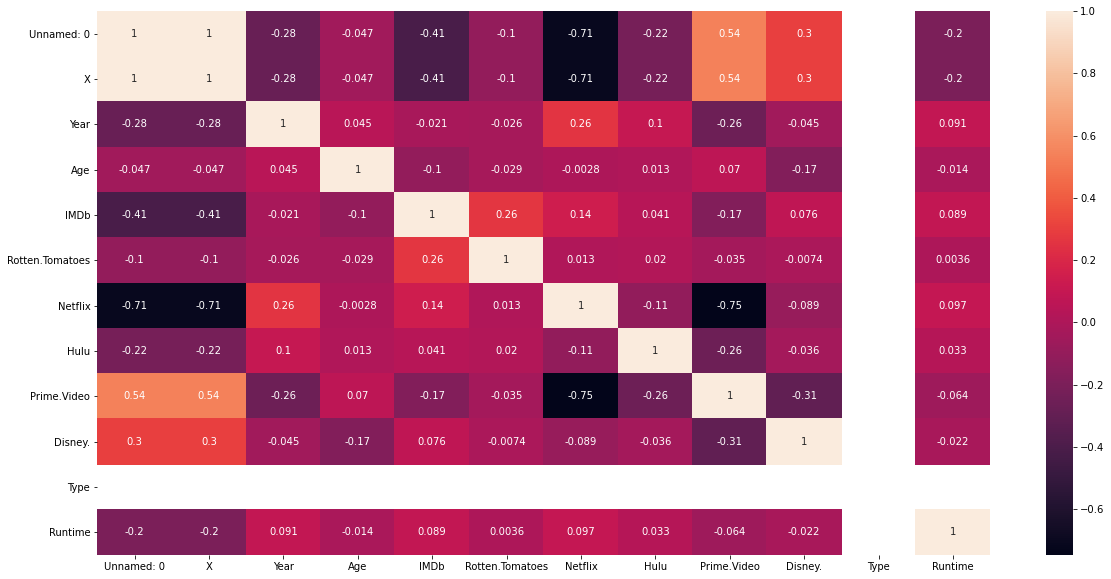

In [42]:
#creates a heatmap visualization of the correlation matrix, with correlation coefficients annotated for each cell.

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

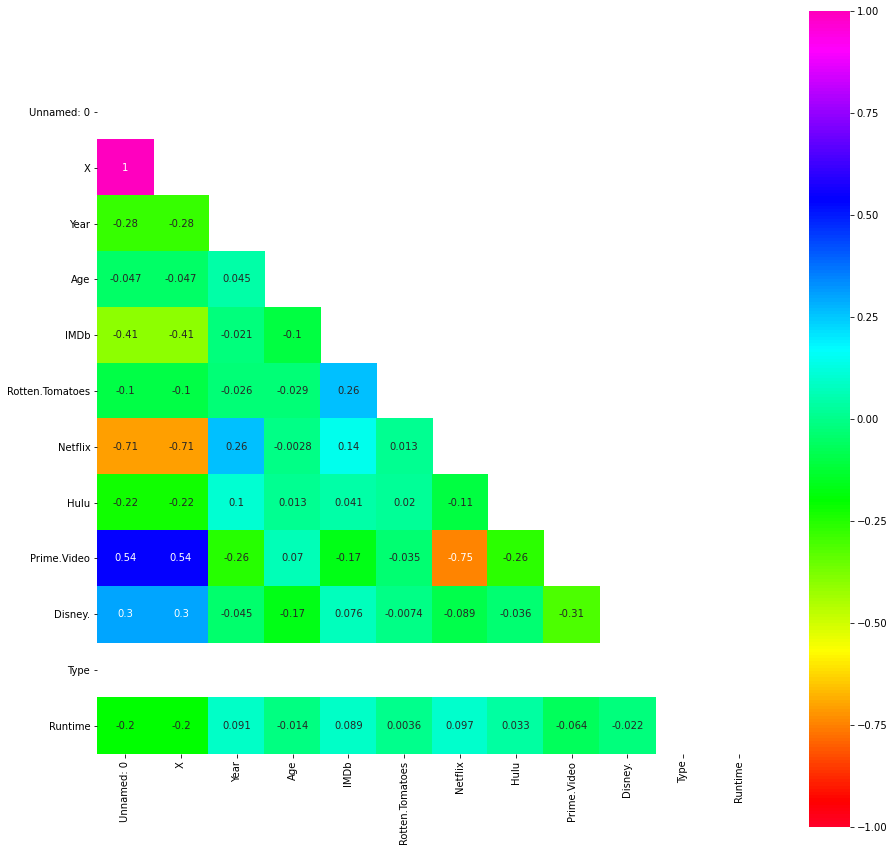

In [43]:
#Creates a square heatmap visualization of the correlation matrix,with the upper triangle mask and correlation coefficients annotated. 
#In a heatmap of a correlation matrix, the upper triangle is a reflection of the lower triangle, so the upper triangle mask hides the redundant half of the matrix to make the heatmap more readable. 
#Lower triangle represents unique correlation between a and b.

fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), mask = np.triu(data.corr()), square = True, annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
plt.show()

In [44]:
#Count of each unique value in the 'IMDb' column.

platform_counts = data['IMDb'].value_counts()
platform_counts

6.5    543
6.2    535
6.4    506
6.3    503
6.1    501
      ... 
9.1      3
9.0      3
1.0      2
1.5      2
1.3      1
Name: IMDb, Length: 82, dtype: int64

In [45]:
#Age Analysis
data["Age"].value_counts()

14    9405
18    3433
7     1442
13    1224
16     315
Name: Age, dtype: int64

In [46]:
#IMDB Rating Data
print("TV Shows with highest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=False).head(20))['Title'])

TV Shows with highest IMDb ratings are= 
6908                                    Down, But Not Out!
4821                                       Love on a Leash
7110                                                Bounty
6525               Steven Banks: Home Entertainment Center
6261                                            Square One
1287     My Next Guest with David Letterman and Shah Ru...
943                                              Natsamrat
7173                                        Finding Family
8122                                        Where's Daddy?
3296                                       The Dark Knight
6690                             Escape from Firebase Kate
6953                                     A Dog Named Gucci
6528                      Peter Gabriel: Secret World Live
9883                    8 Wheels & Some Soul Brotha' Music
8027                                 Stronger Than Bullets
8459                      The Jones Family Will Make a Way
10681          

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

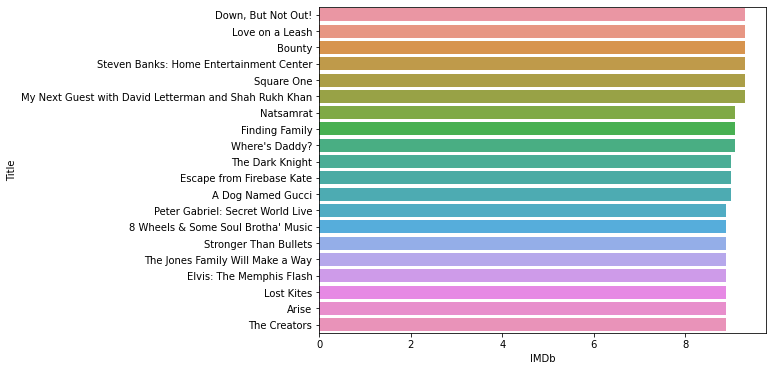

In [47]:
#Now, the top 20 shows with the best ratings.
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=False).head(20))

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

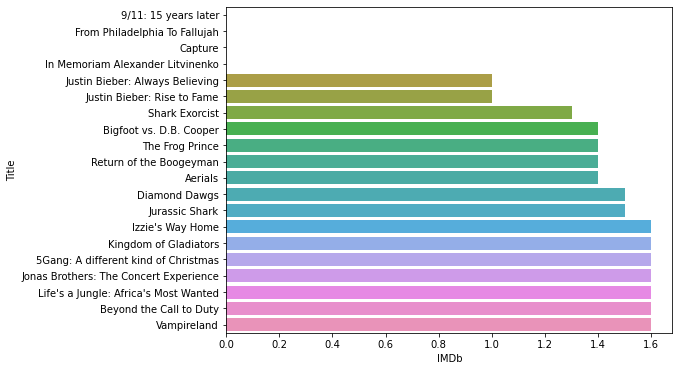

In [48]:
#Now, the TV shows with the worst ratings.
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=True).head(20))

In [49]:
#we shall cluster the TV shows based on the IMDB rating and Rotten Tomatoes score. First, we start by taking the data.
#Taking the relevant data
ratings=data[["Title",'IMDb',"Rotten.Tomatoes"]]
ratings.head()

Title  IMDb  Rotten.Tomatoes
0                       Inception   8.8               87
1                      The Matrix   8.7               87
2          Avengers: Infinity War   8.5               84
3              Back to the Future   8.5               96
4  The Good, the Bad and the Ugly   8.8               97

C:\Users\ARCHANA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



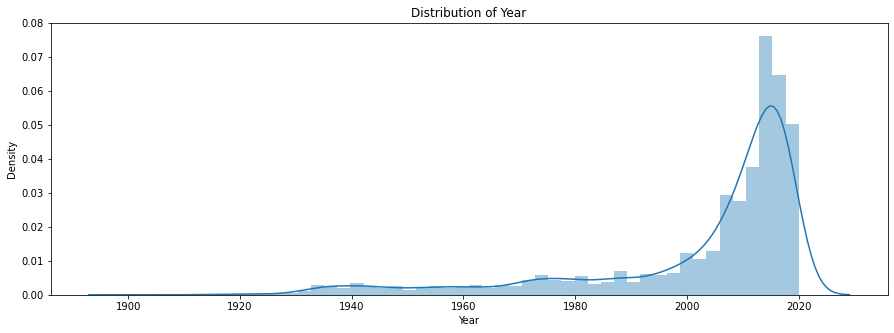

In [50]:
#Visualization of data distribution for year variable using seaborn.
plt.figure(figsize=[15,5])
plt.title("Distribution of Year")
sns.distplot(data['Year'],)
plt.show()

C:\Users\ARCHANA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



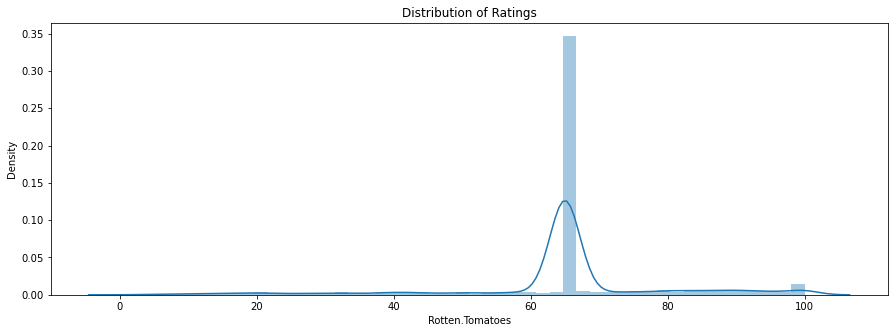

In [51]:
#Plotting distribution of Rotten Tomatoes ratings using seaborn library.
plt.figure(figsize=[15,5])
plt.title("Distribution of Ratings")
sns.distplot(data['Rotten.Tomatoes'])
plt.show()

C:\Users\ARCHANA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



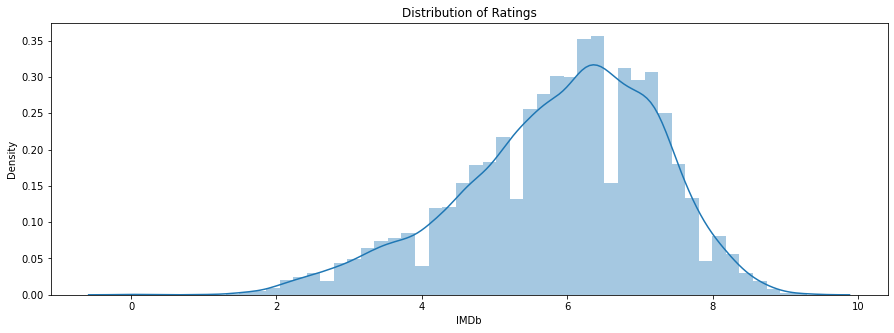

In [52]:
#This code plots the distribution of IMDb ratings.
plt.figure(figsize=[15,5])
plt.title("Distribution of Ratings")
sns.distplot(data['IMDb'])
plt.show()

In [53]:
## Objective question

In [54]:
# calculate the average rating of each director across platforms
director_ratings = data.groupby(['Directors'])[['IMDb', 'Netflix', 'Hulu', 'Prime.Video', 'Disney.']].mean()
# calculate the overall average rating for each director
director_ratings['Overall'] = director_ratings.mean(axis=1)
# sort the directors based on their overall average rating
top_directors = director_ratings.sort_values(by=['Overall'], ascending=False).head(5)

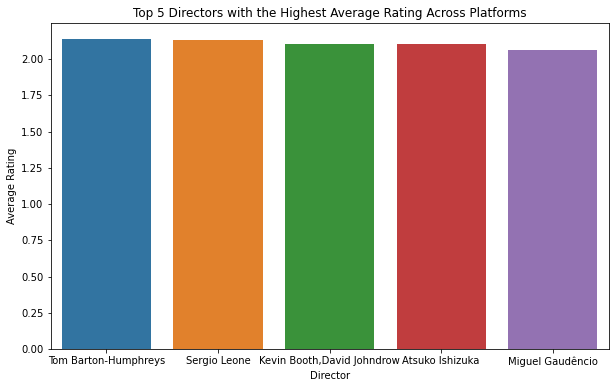

In [55]:
# plot the top 5 directors based on their overall average rating
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.index, y=top_directors['Overall'])
plt.title('Top 5 Directors with the Highest Average Rating Across Platforms')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

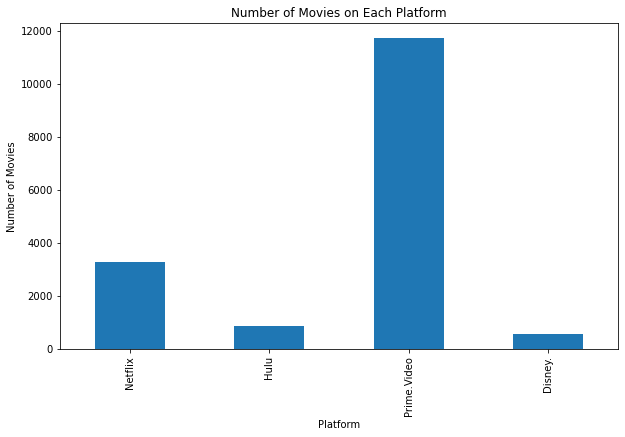

In [56]:
# plot the number of movies on each platform
platform_counts = data[['Netflix', 'Hulu', 'Prime.Video', 'Disney.']].sum()
platform_counts.plot(kind='bar', figsize=(10,6))
plt.title('Number of Movies on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Movies')
plt.show()

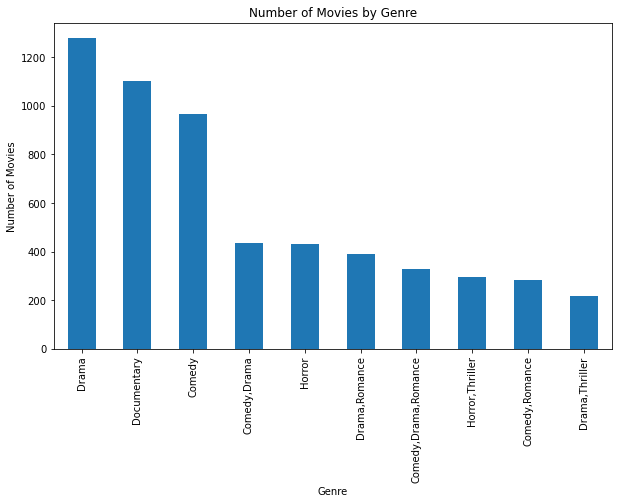

In [57]:
# plot the number of movies by genre
genre_counts = data['Genres'].value_counts().head(10)
genre_counts.plot(kind='bar', figsize=(10,6))
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

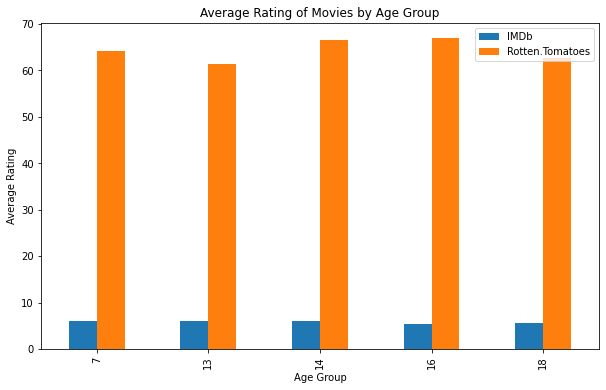

In [58]:
# plot the average rating of movies by age group
age_ratings = data.groupby(['Age'])[['IMDb', 'Rotten.Tomatoes']].mean()
age_ratings.plot(kind='bar', figsize=(10,6))
plt.title('Average Rating of Movies by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

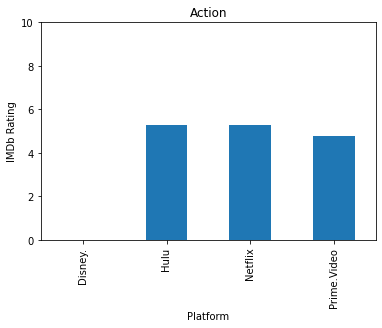

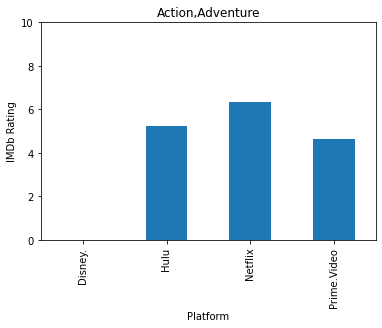

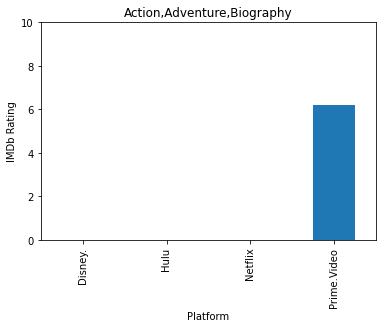

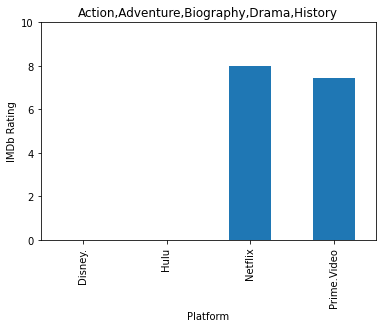

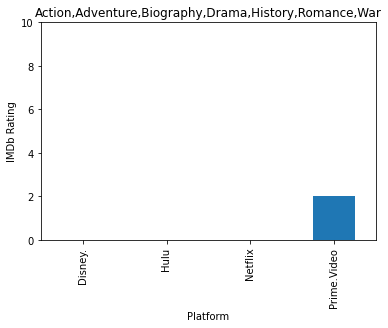

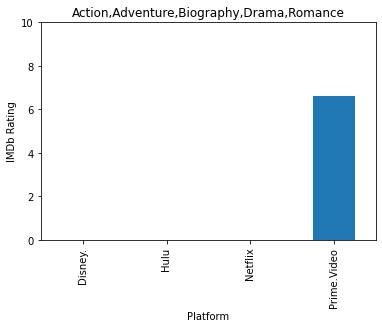

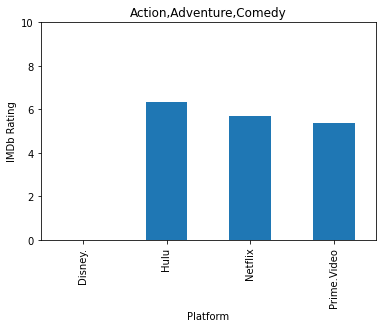

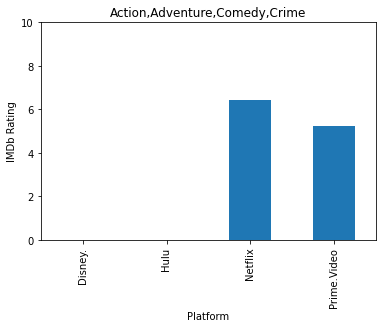

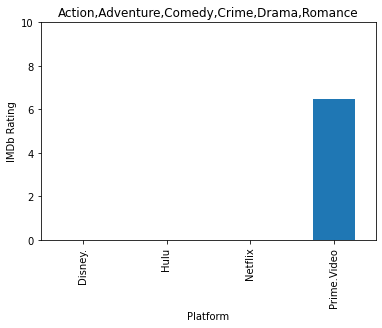

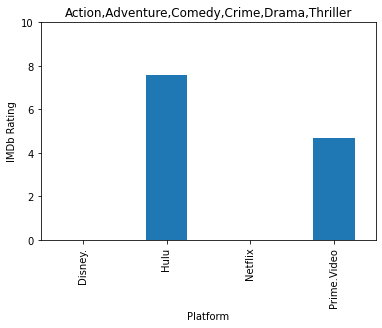

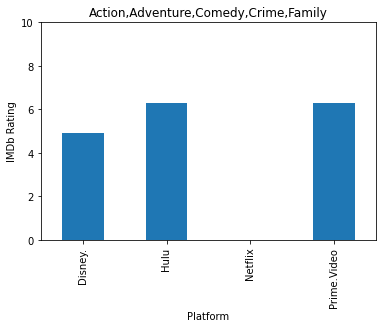

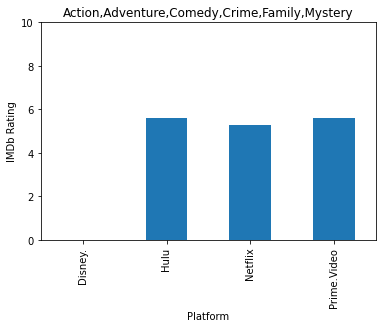

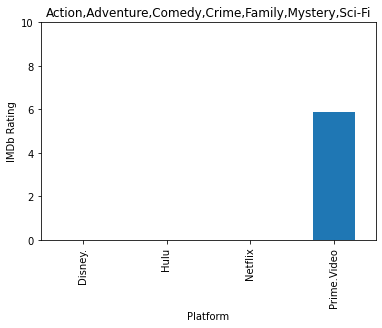

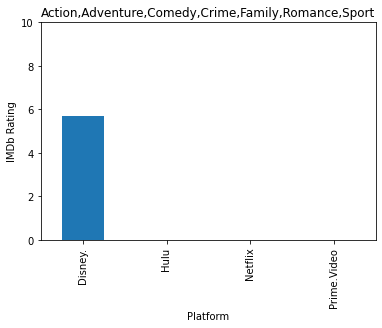

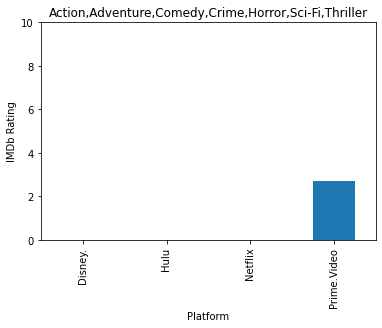

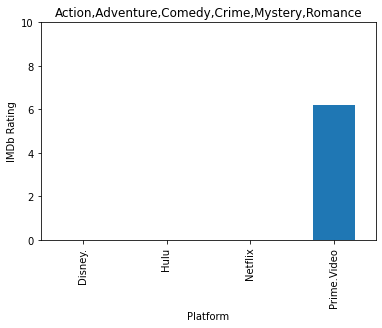

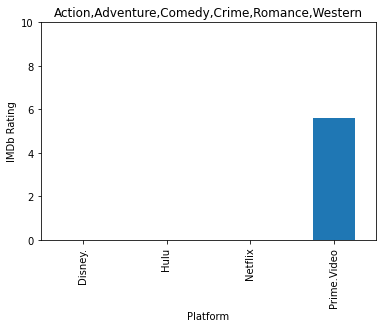

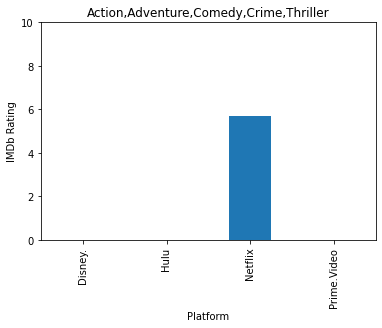

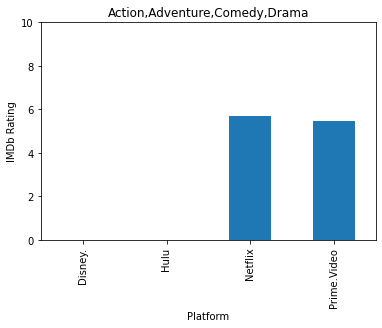

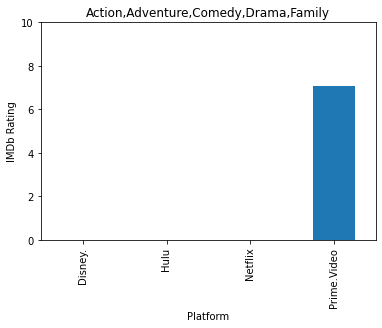

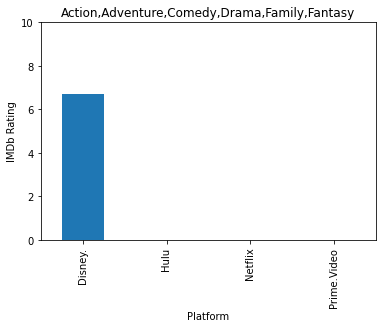

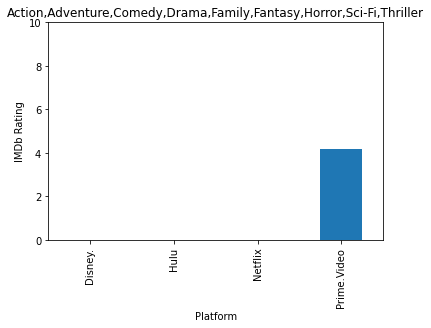

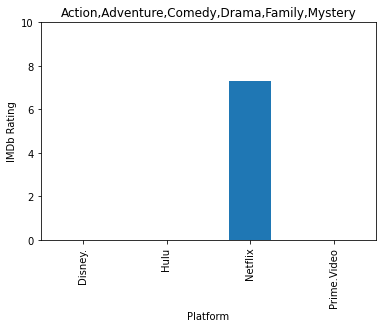

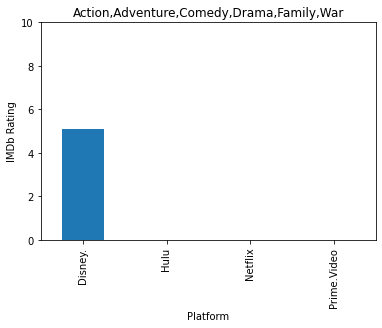

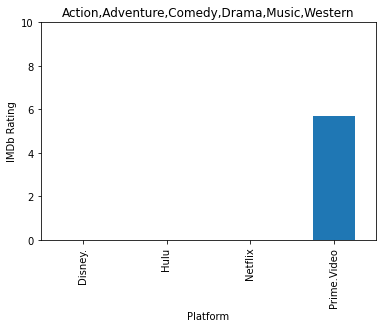

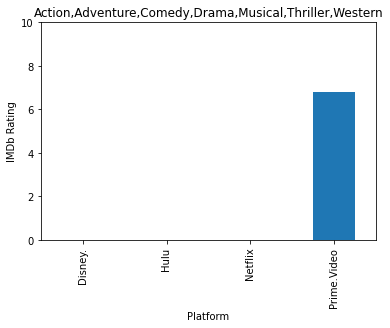

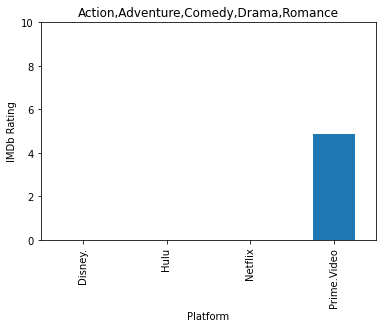

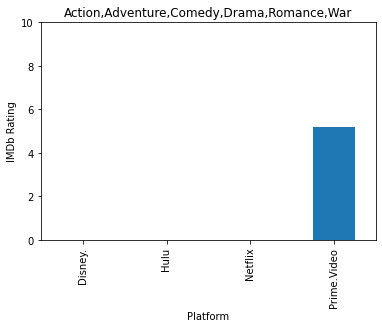

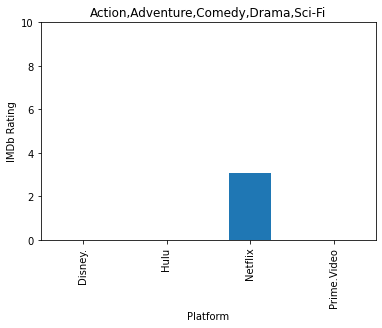

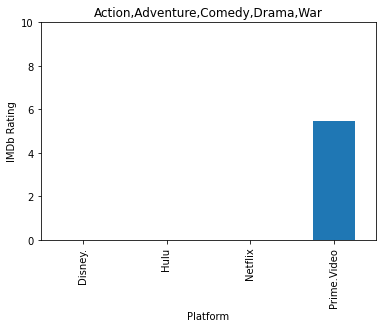

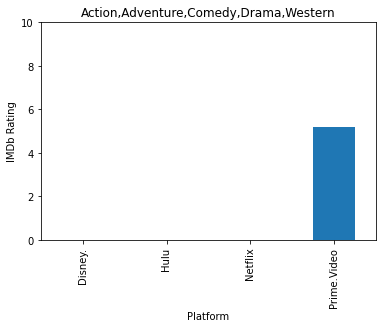

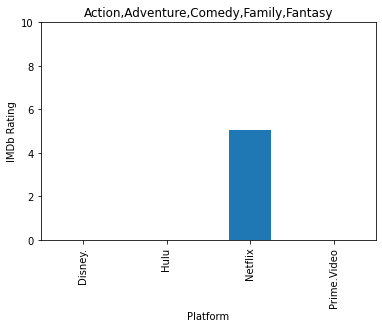

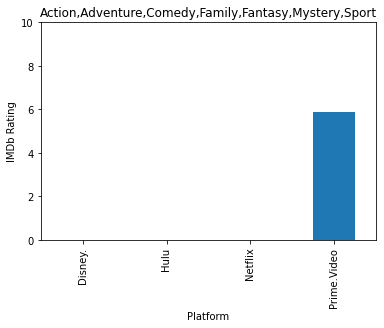

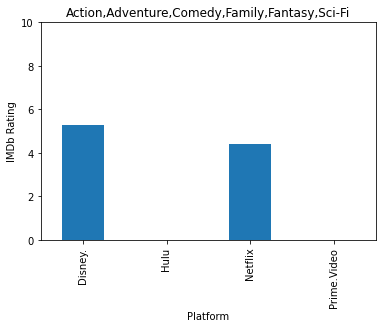

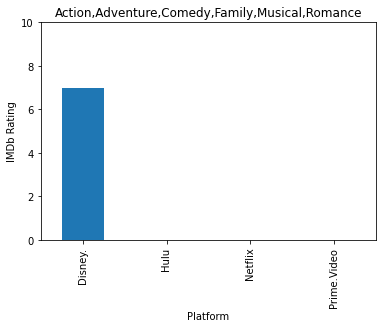

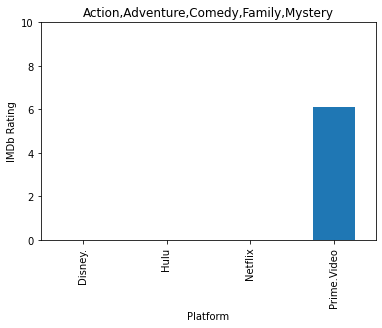

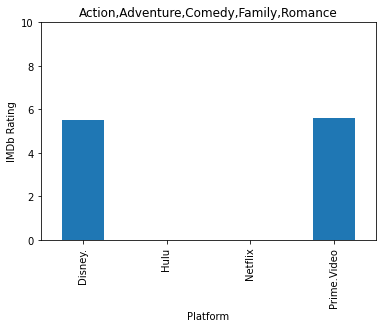

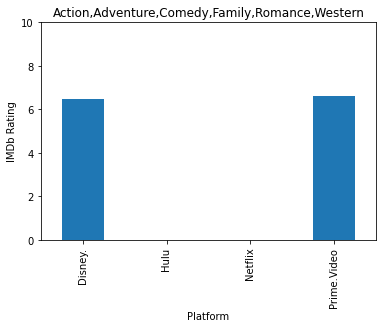

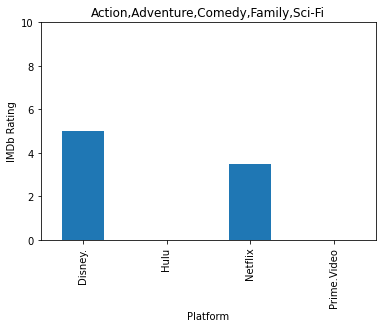

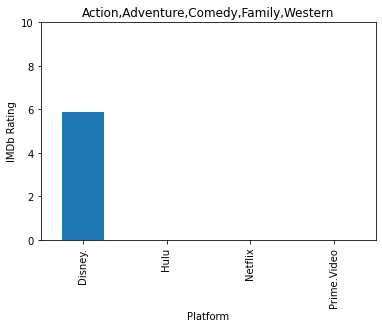

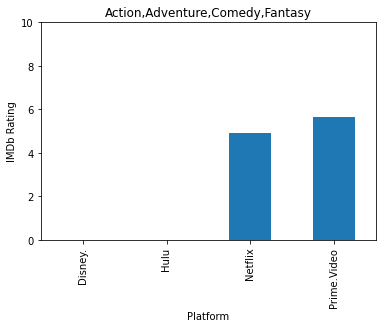

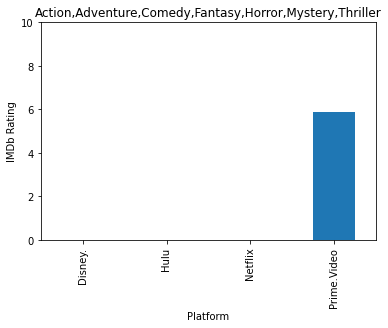

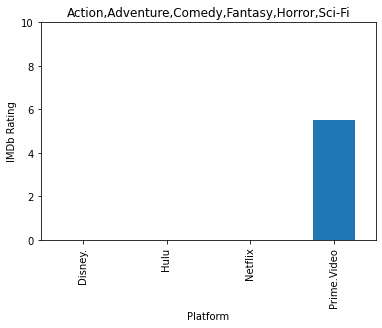

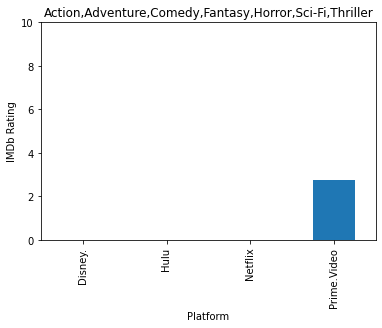

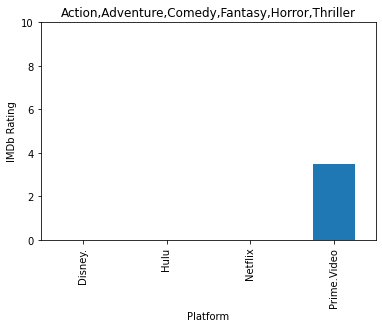

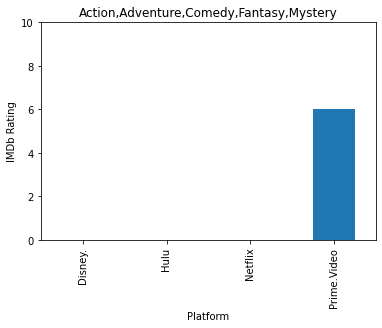

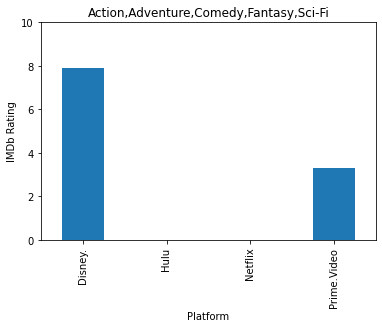

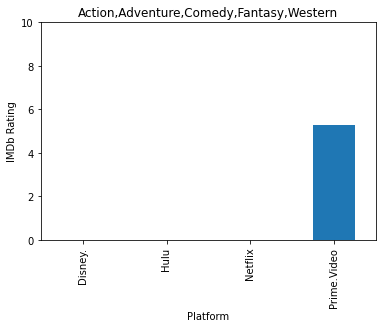

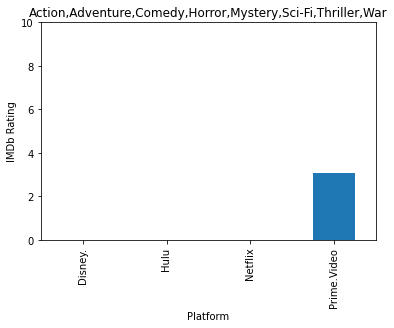

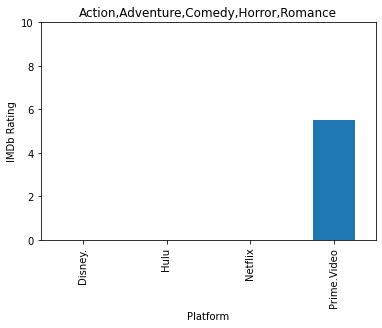

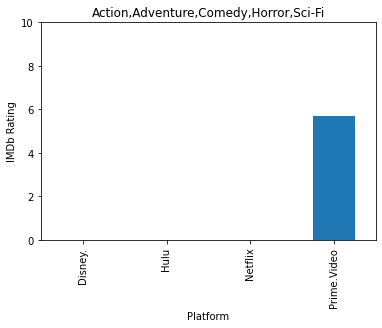

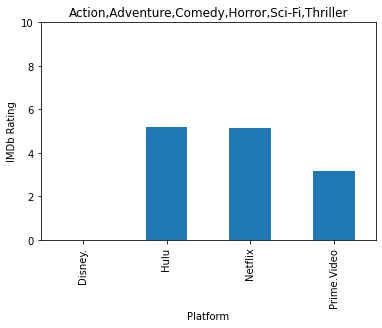

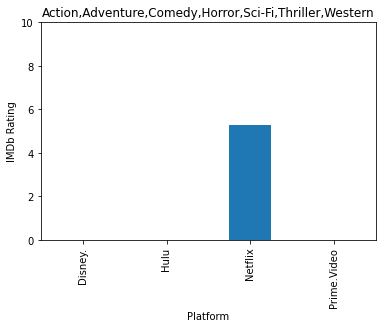

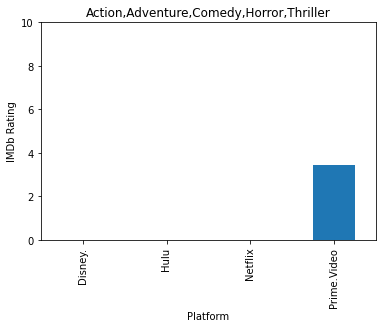

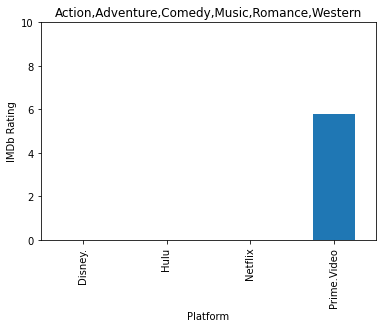

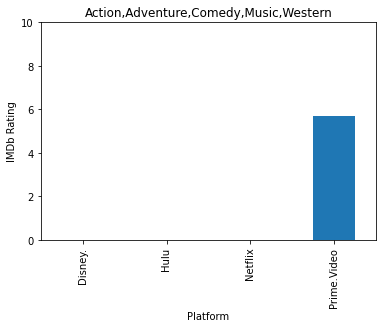

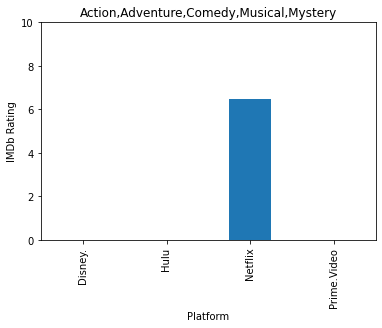

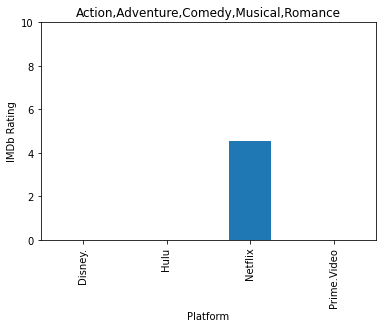

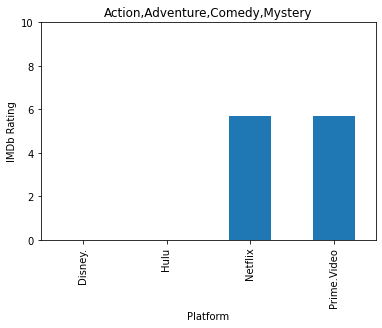

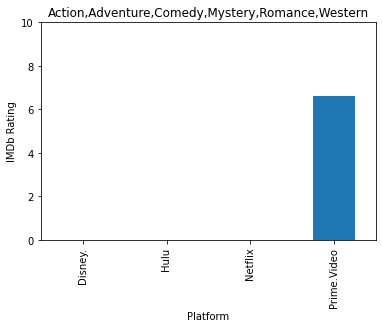

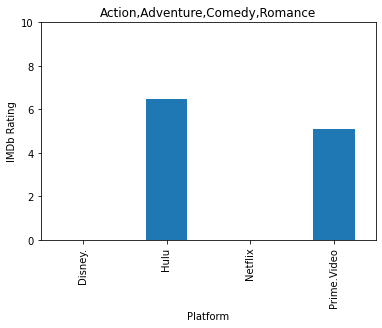

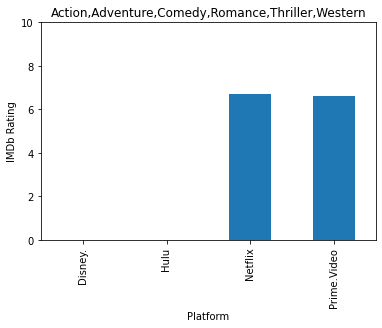

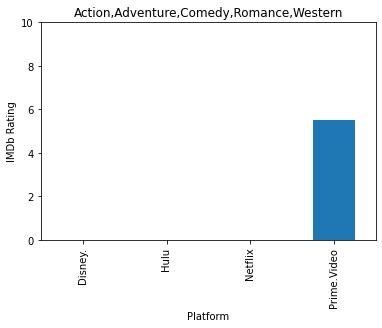

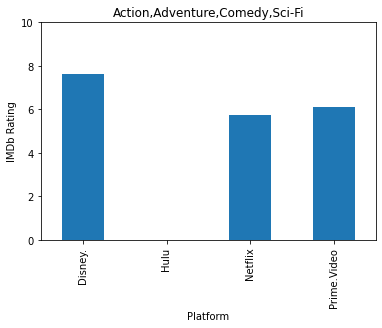

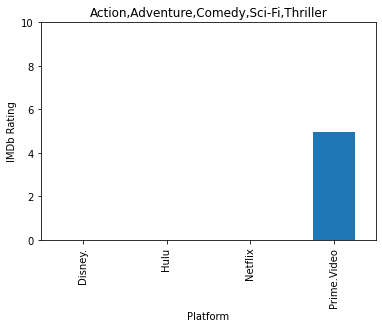

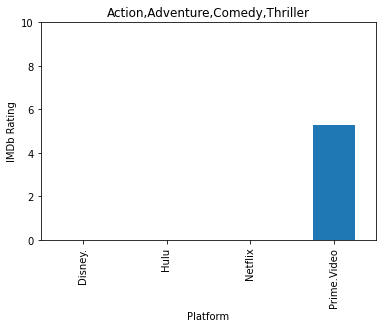

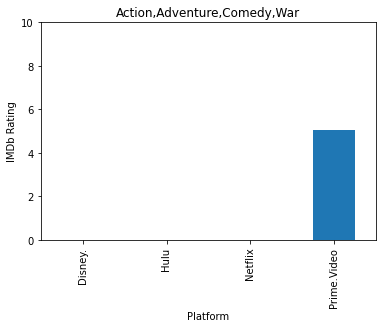

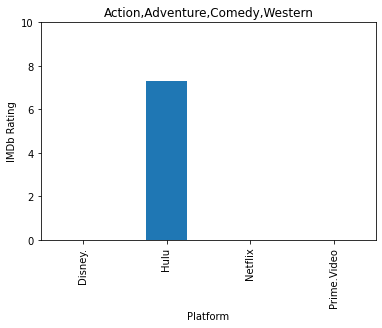

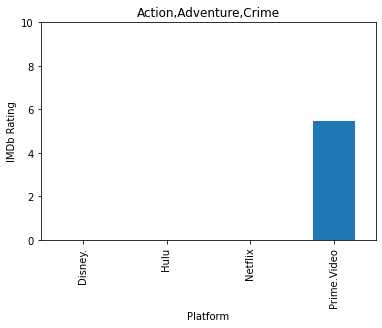

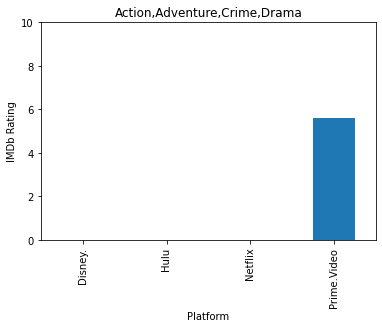

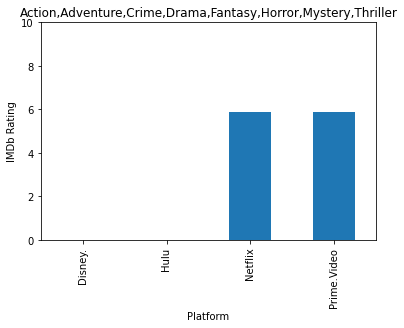

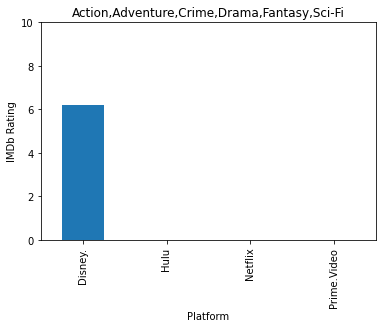

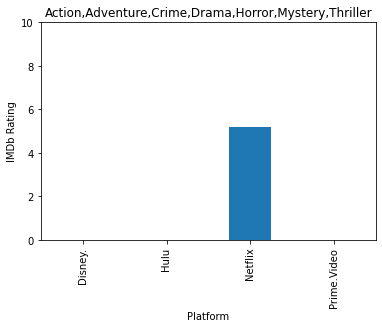

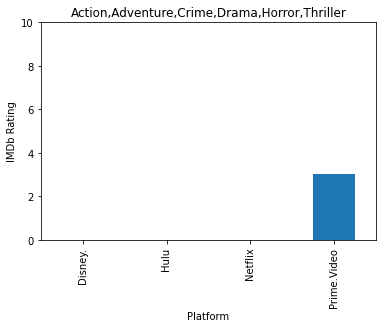

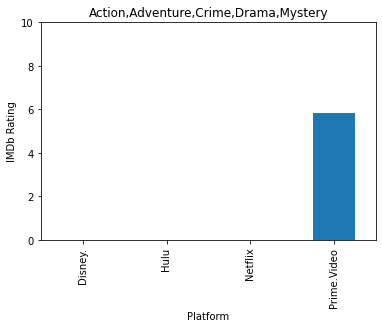

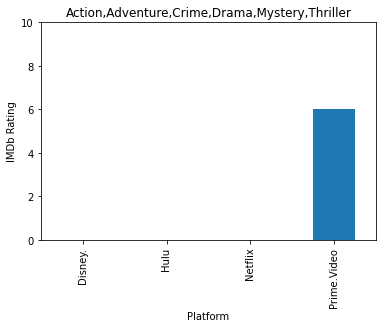

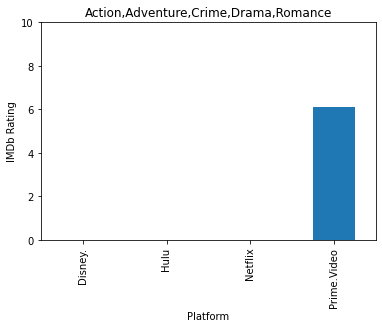

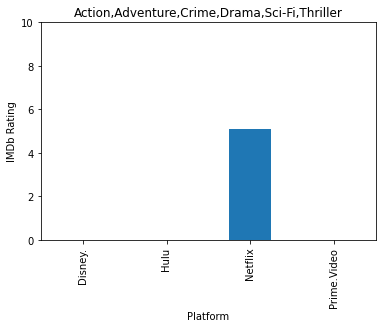

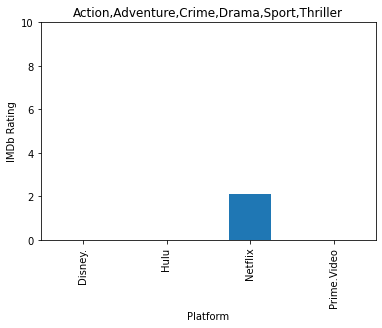

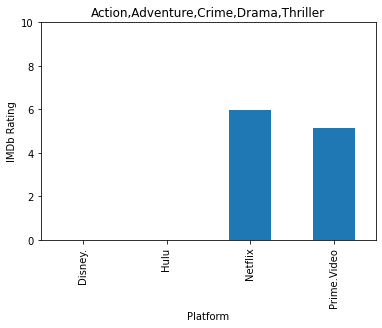

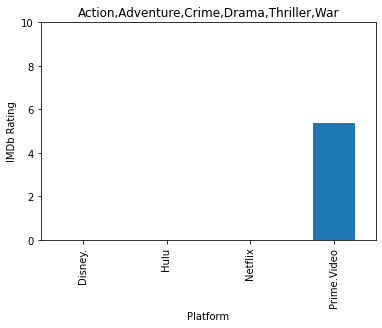

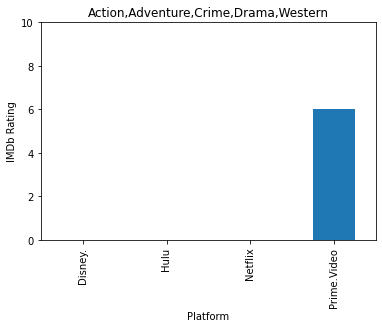

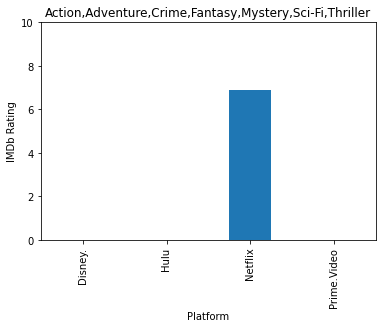

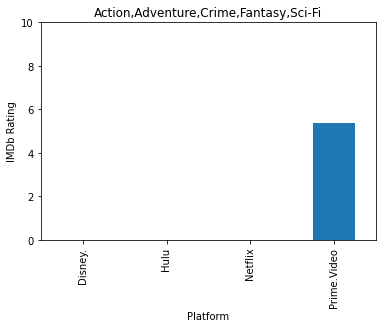

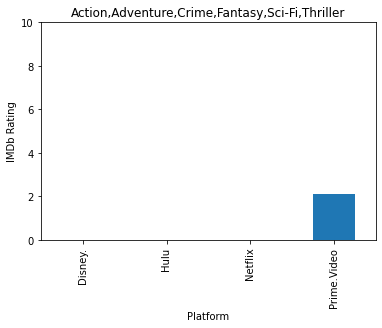

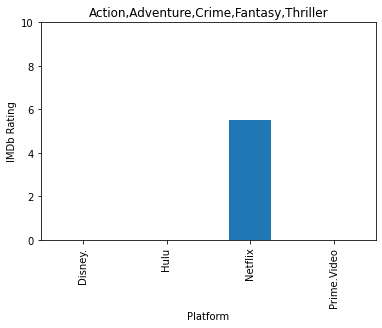

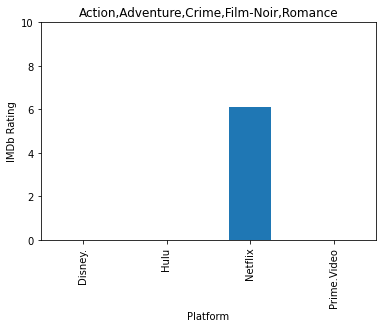

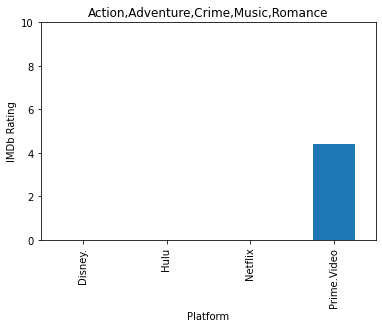

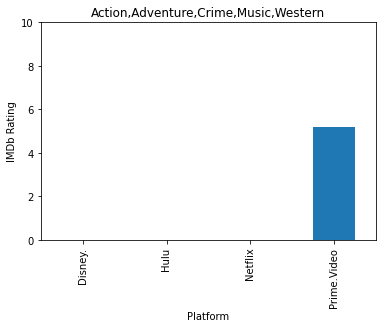

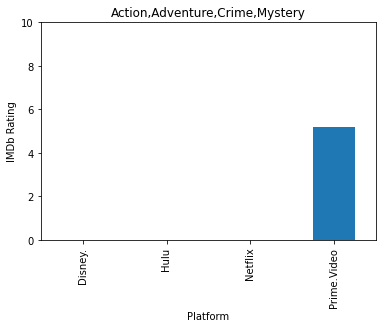

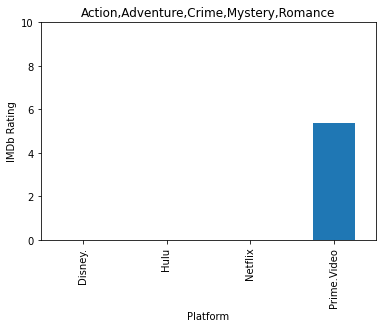

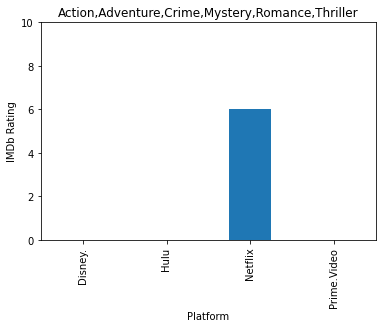

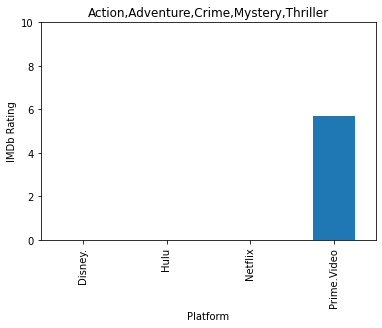

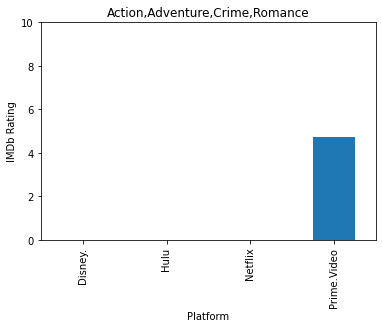

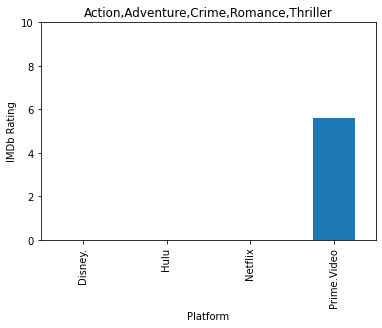

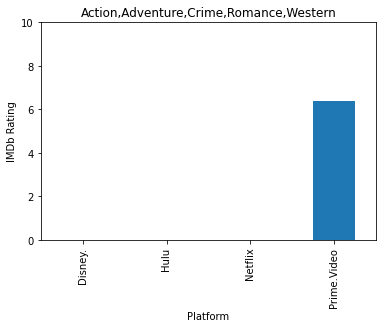

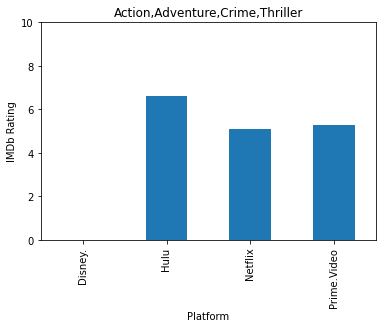

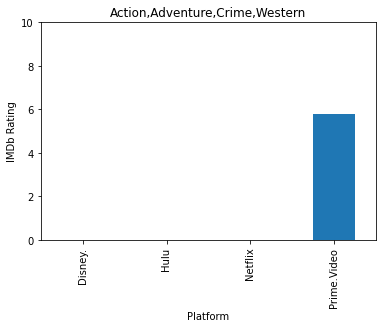

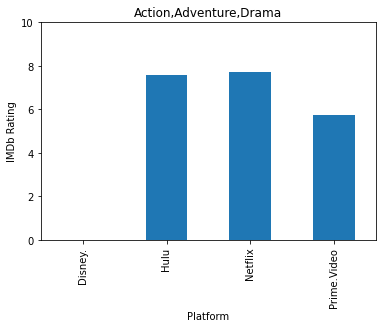

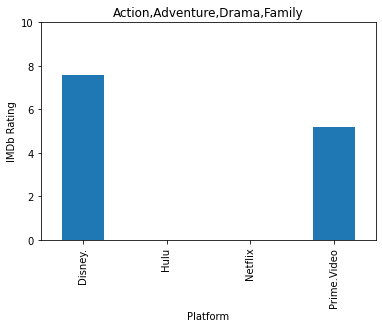

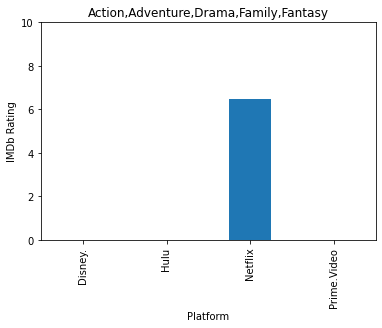

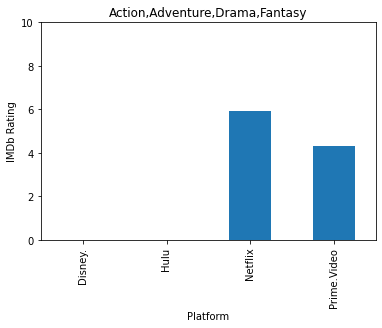

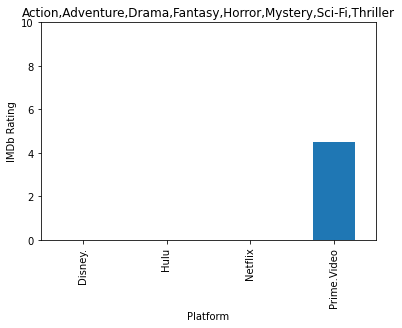

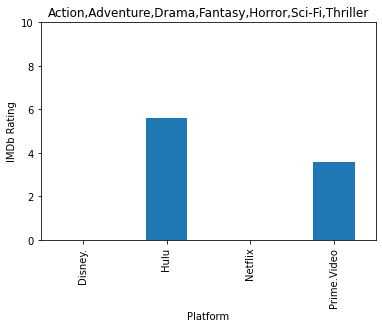

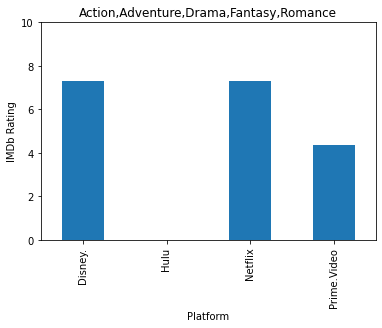

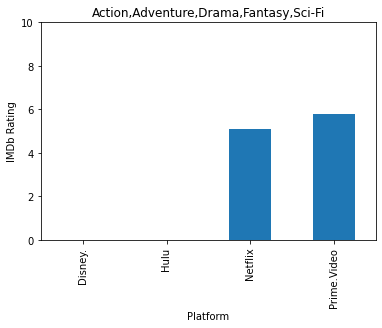

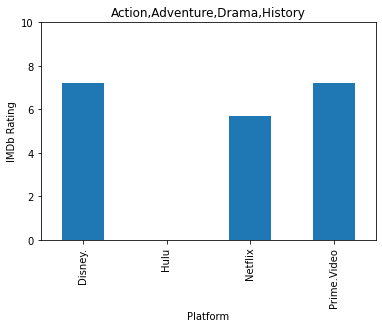

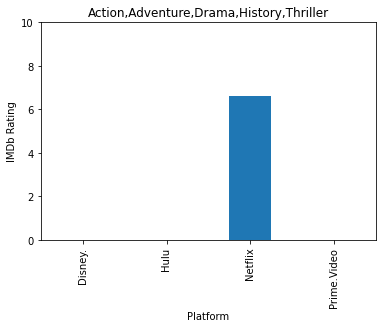

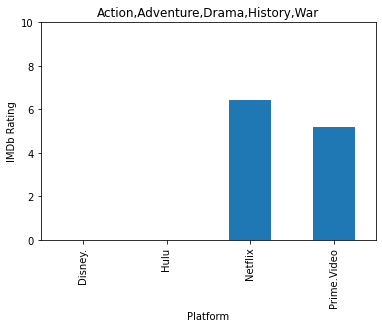

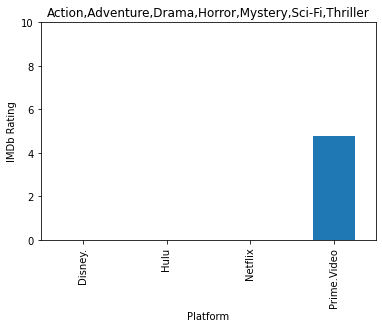

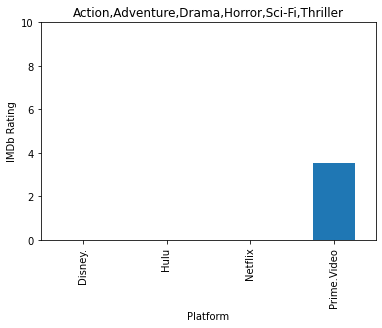

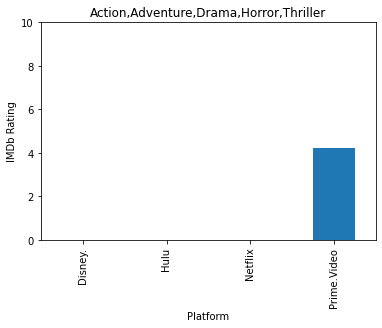

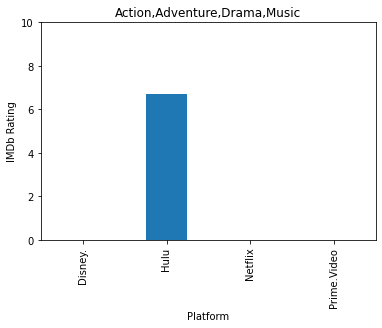

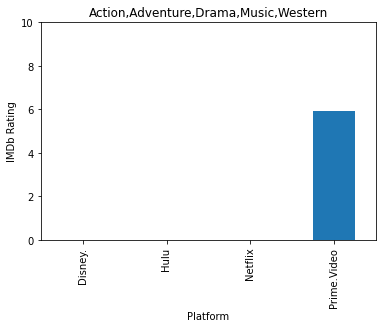

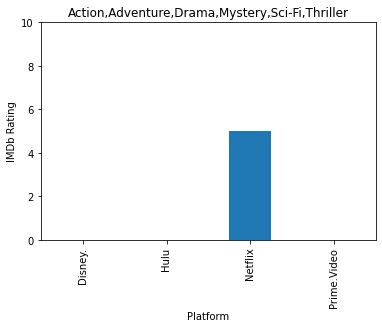

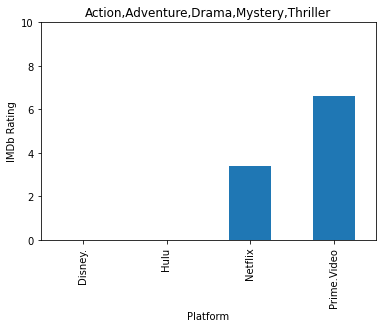

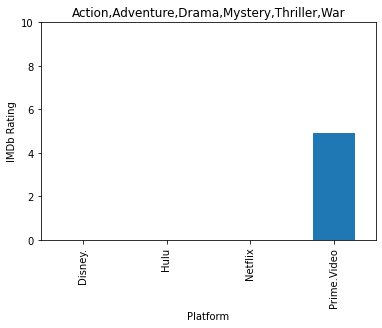

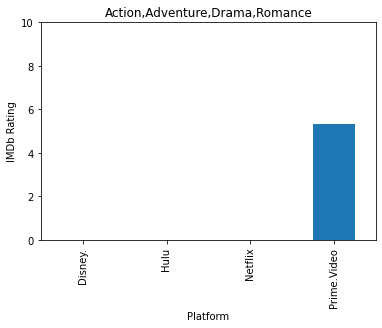

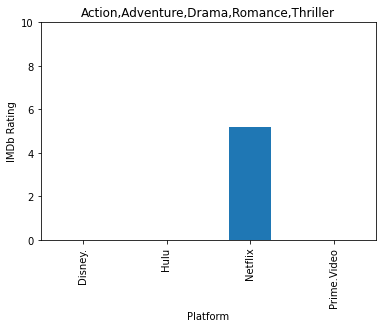

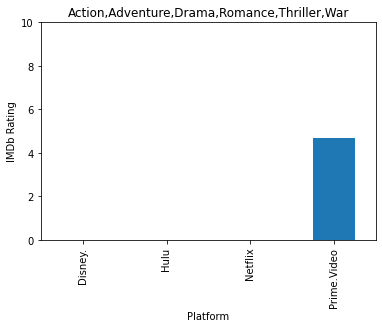

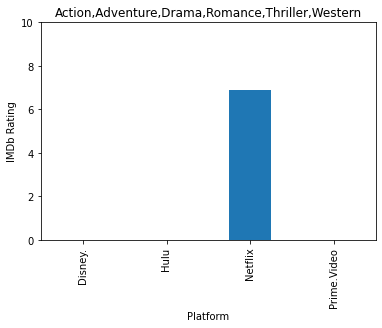

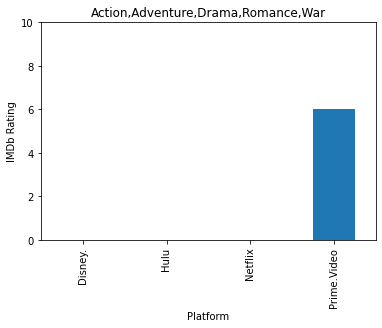

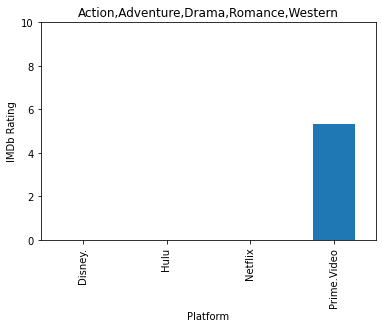

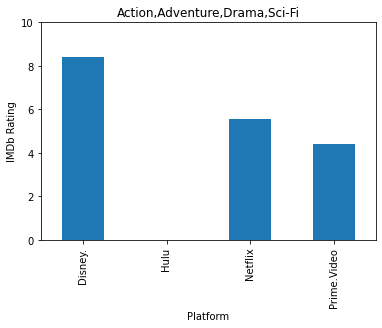

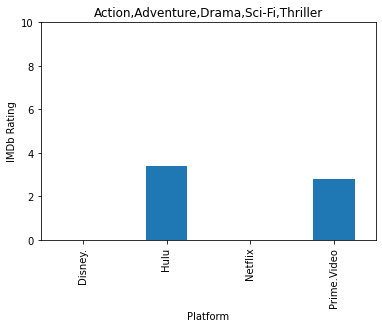

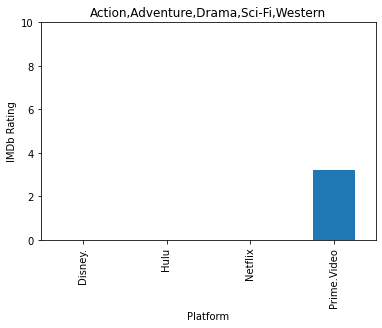

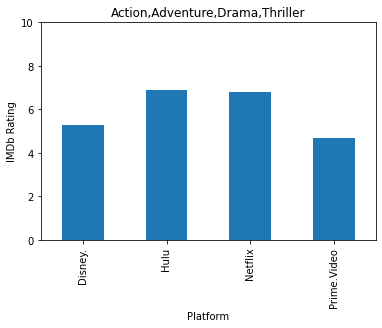

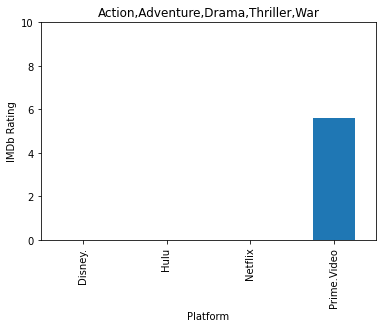

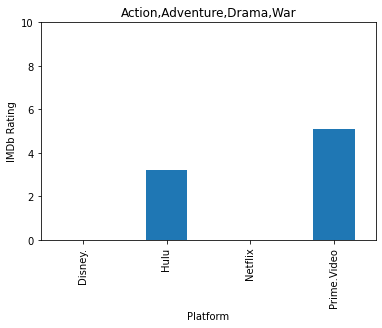

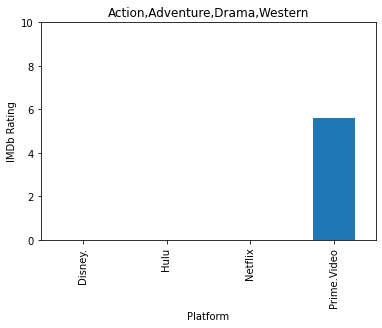

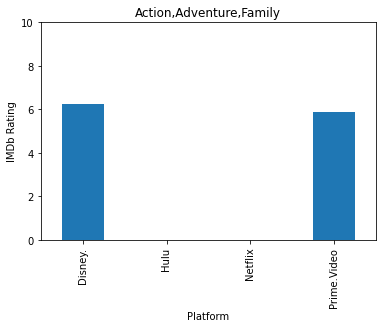

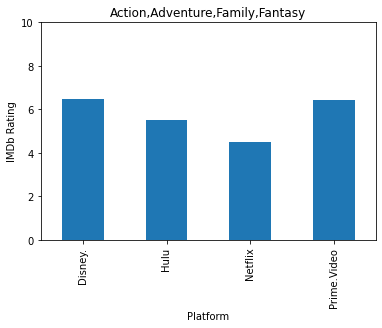

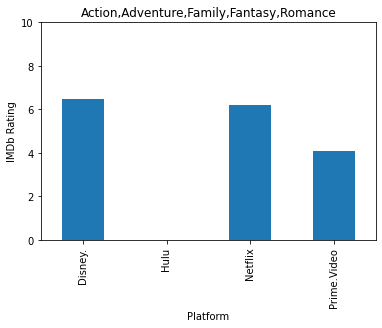

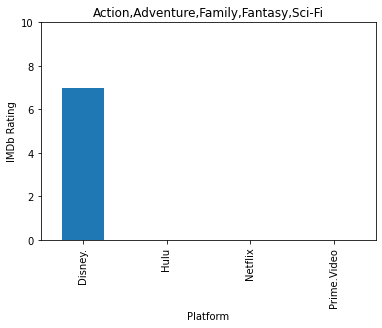

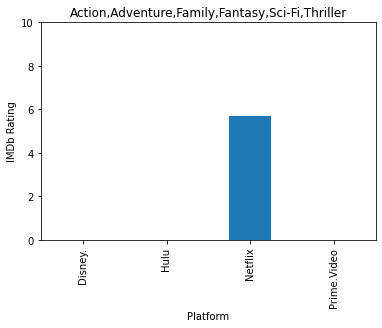

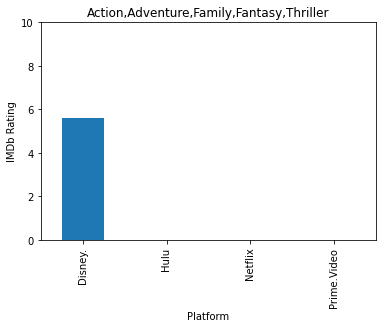

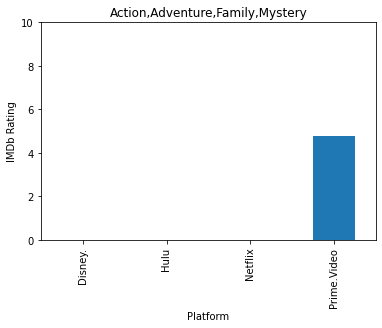

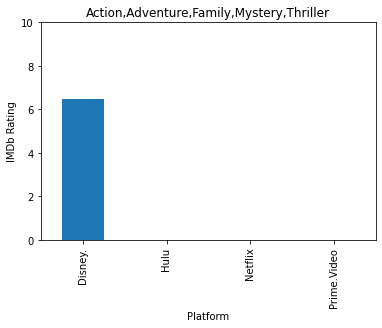

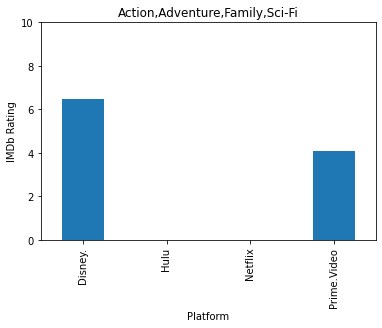

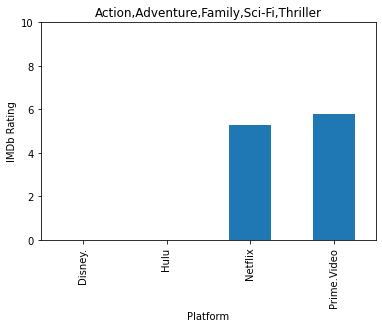

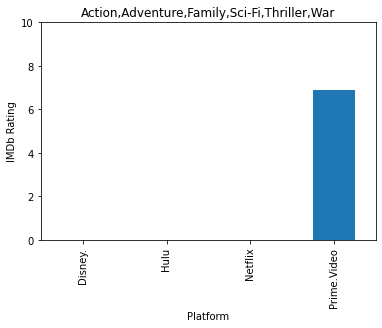

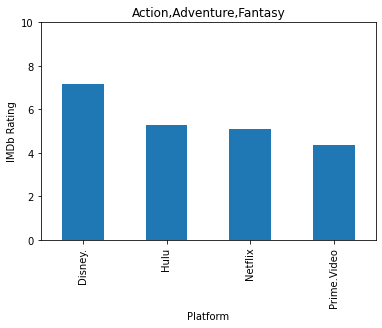

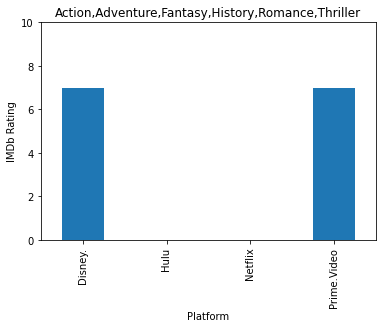

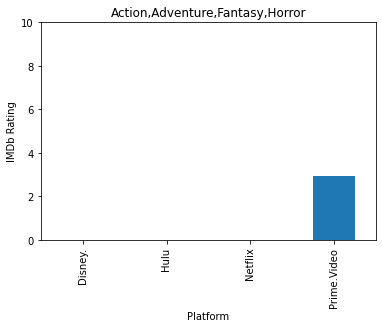

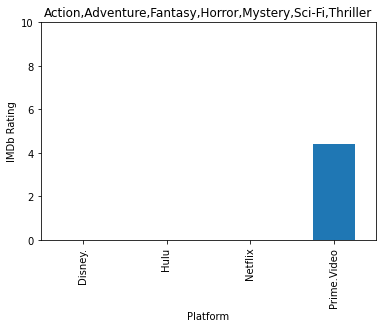

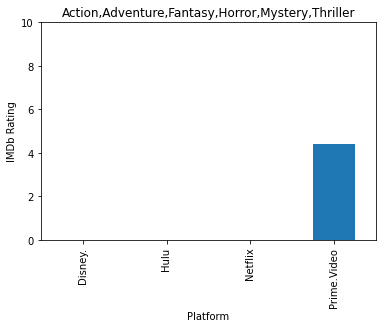

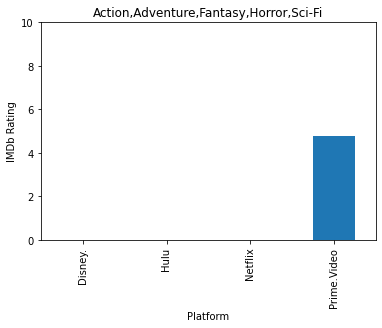

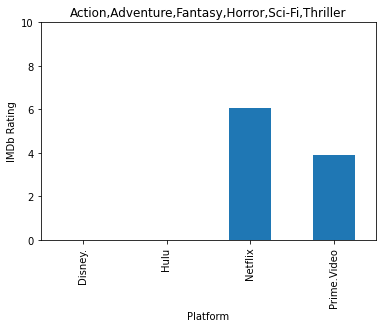

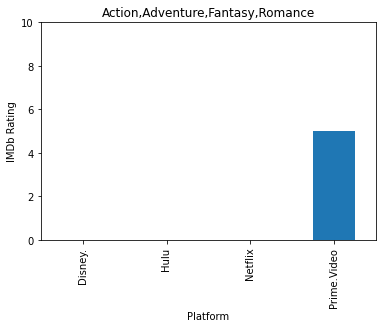

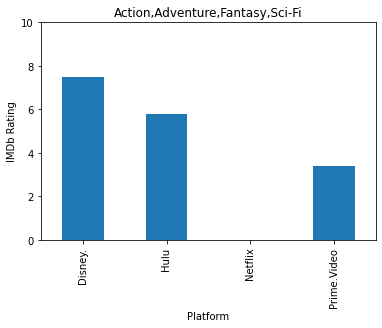

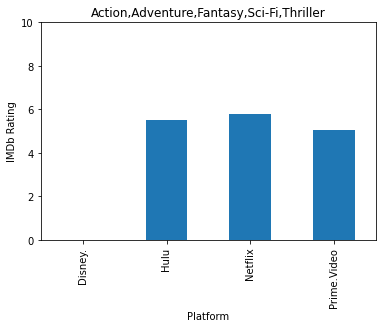

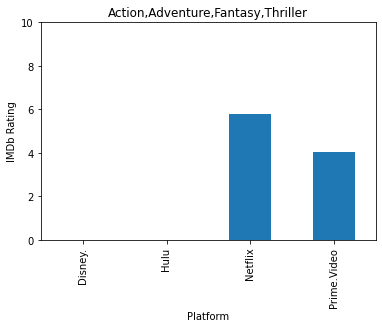

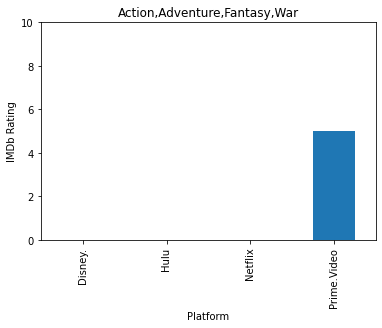

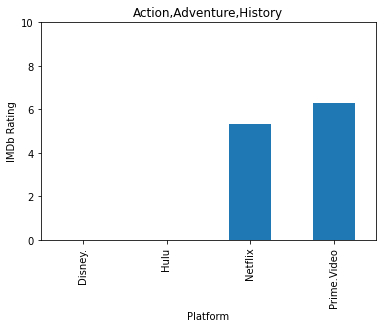

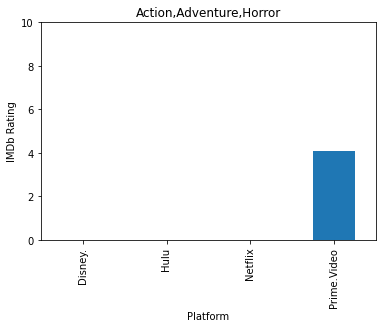

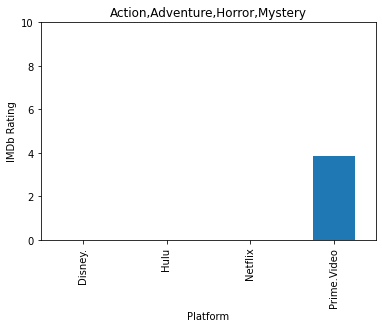

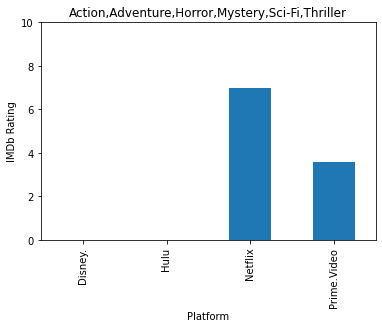

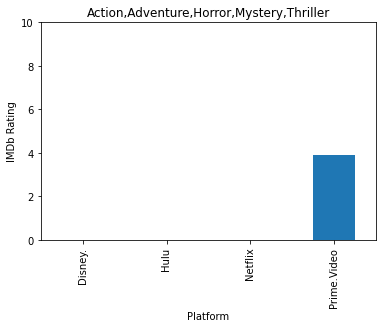

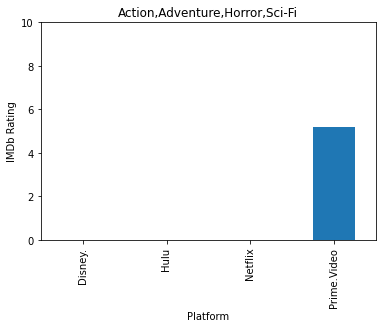

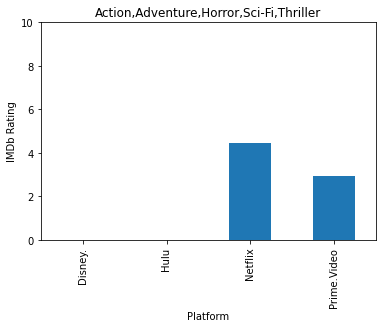

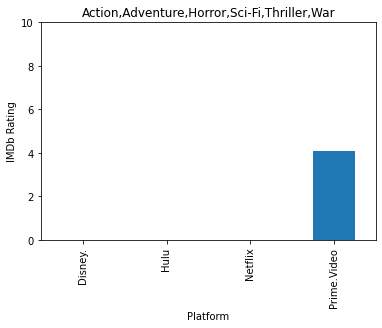

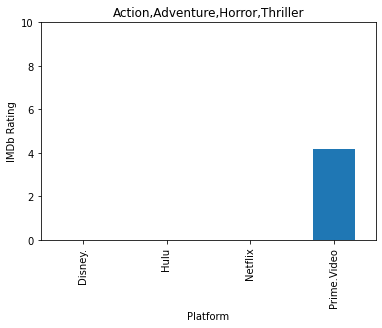

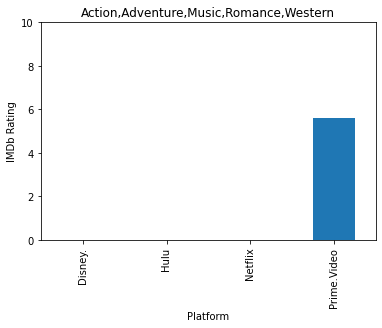

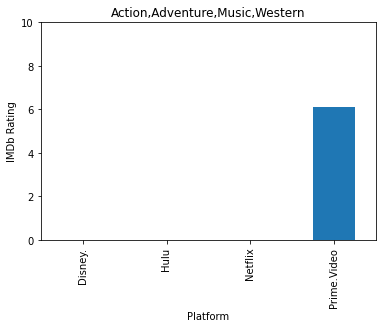

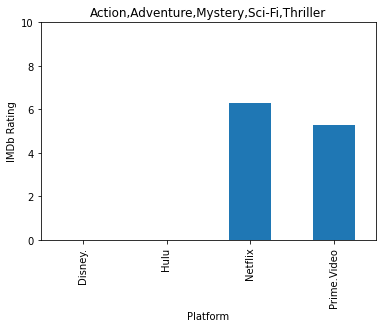

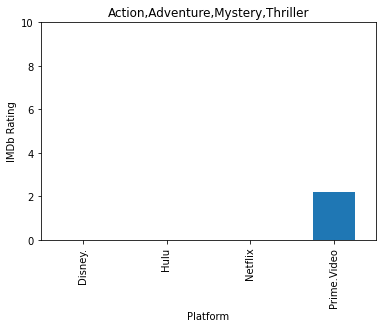

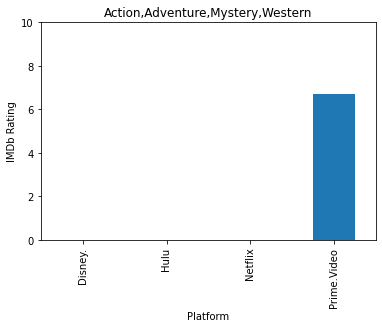

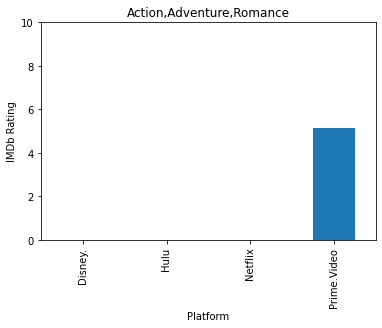

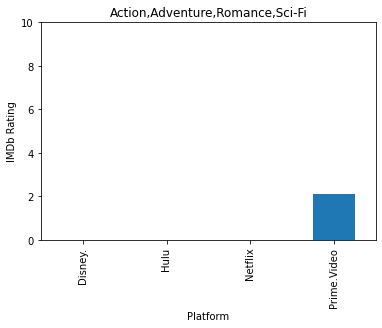

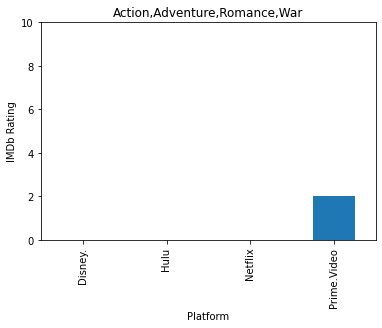

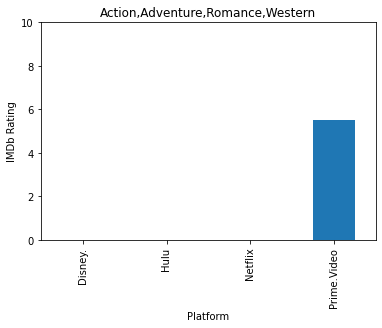

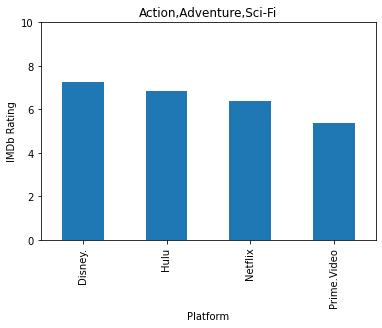

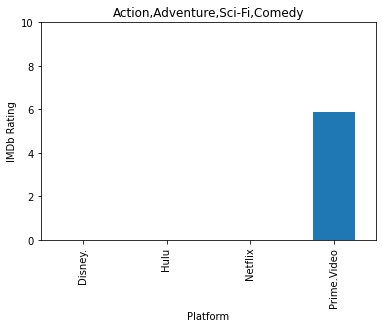

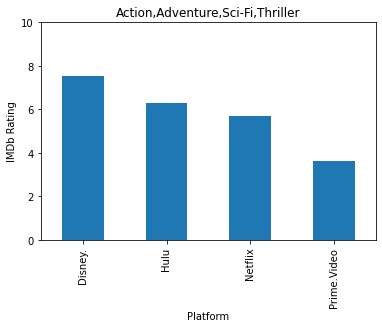

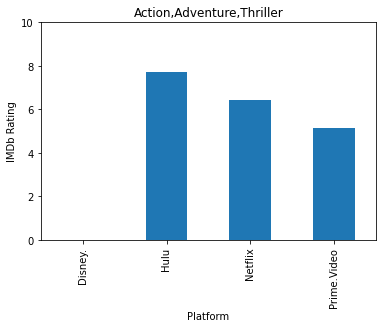

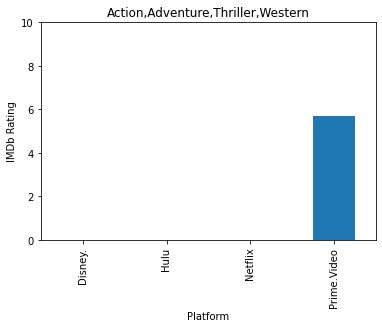

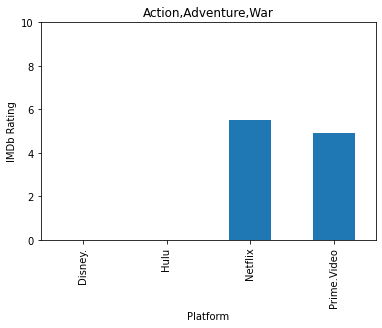

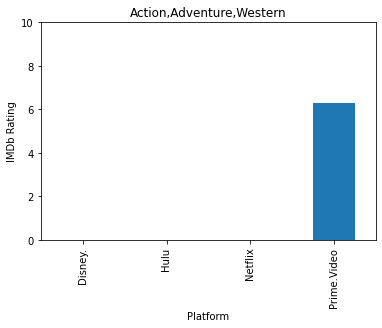

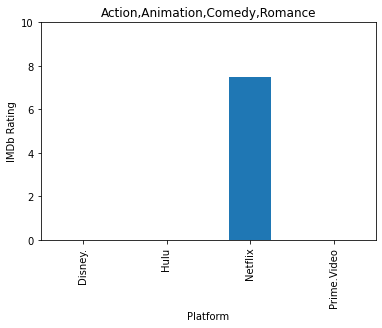

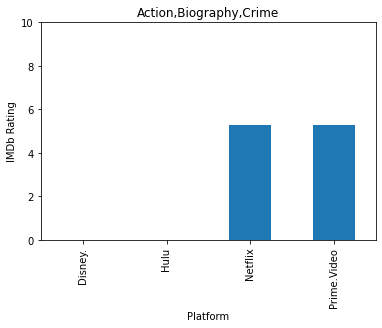

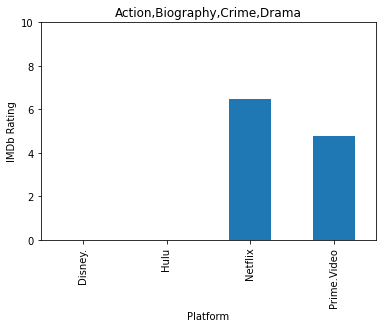

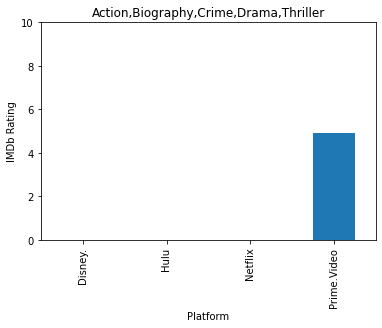

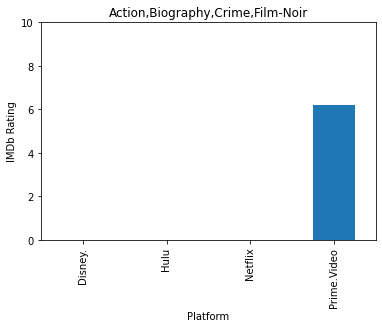

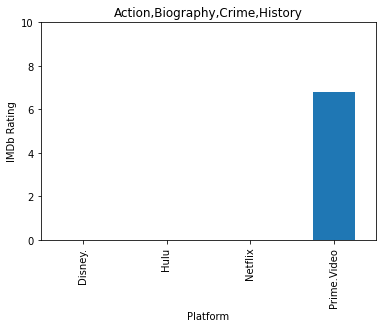

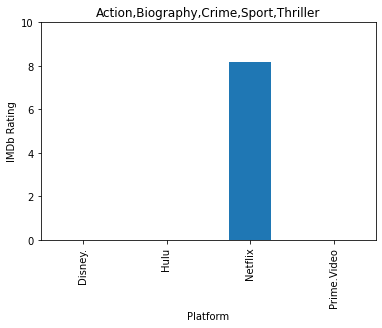

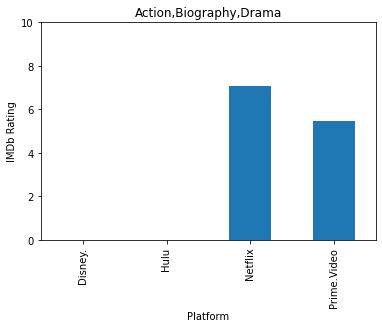

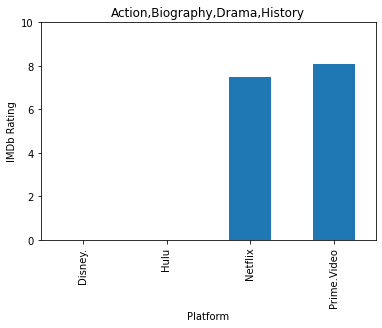

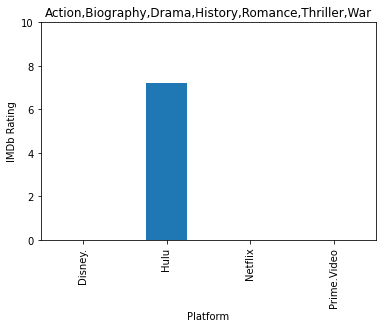

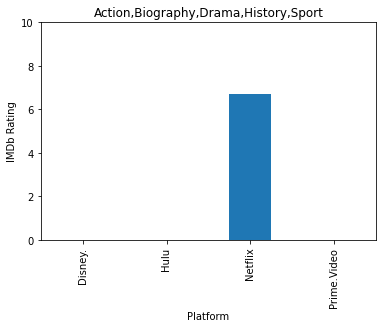

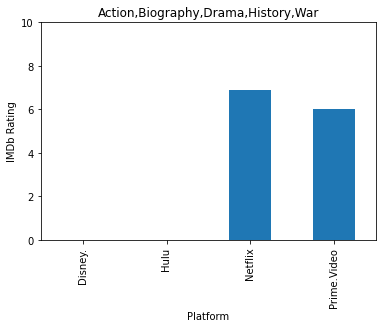

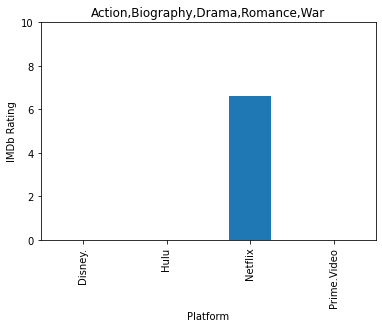

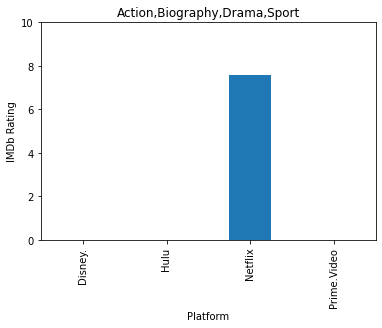

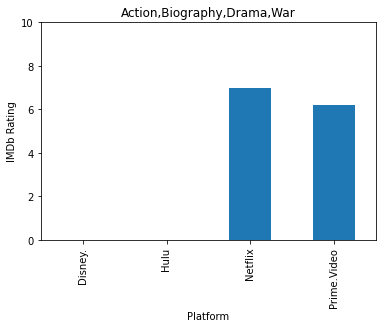

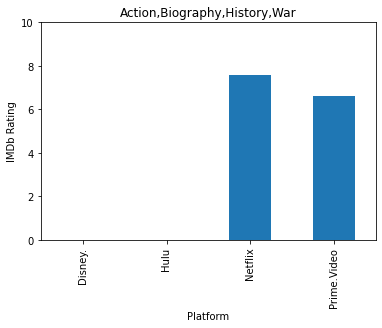

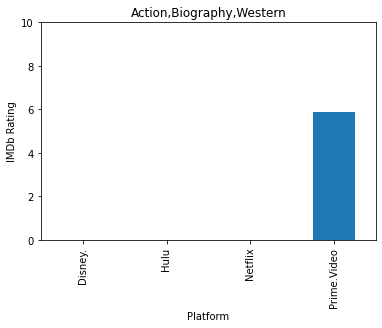

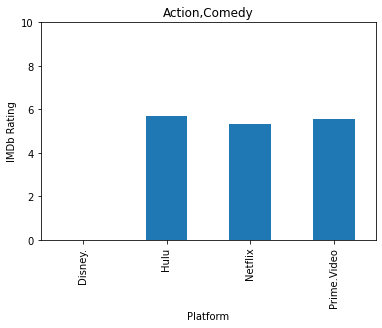

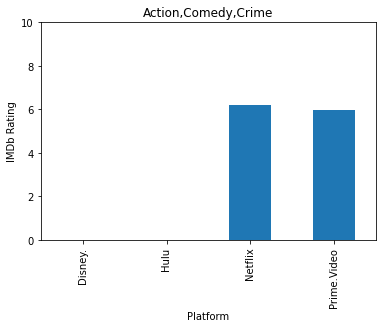

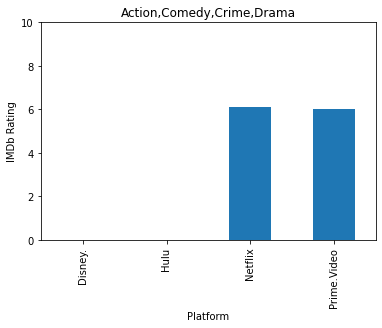

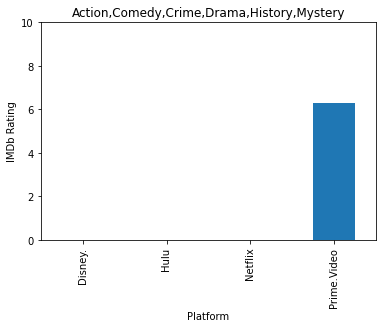

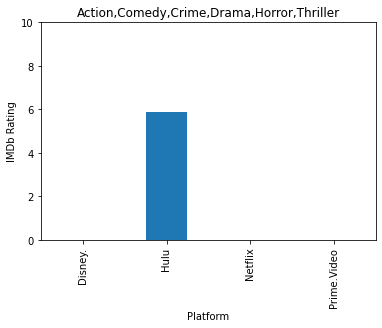

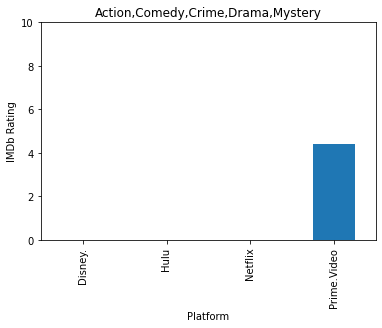

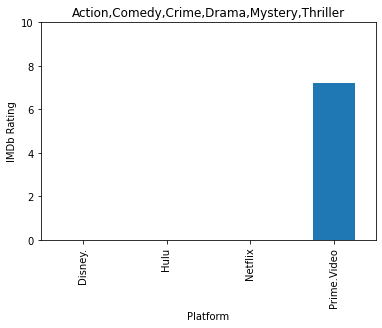

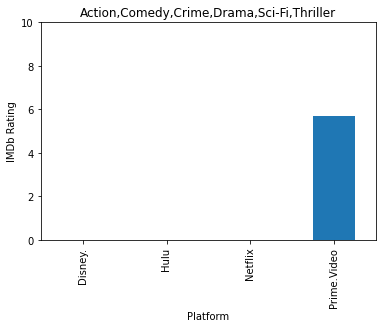

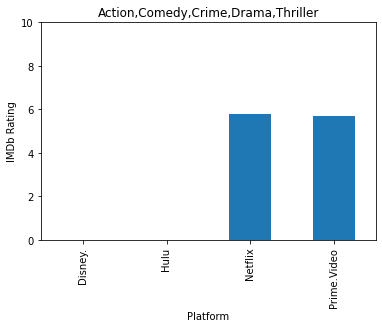

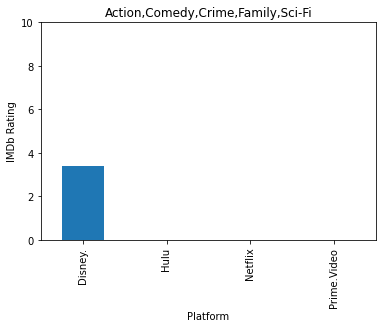

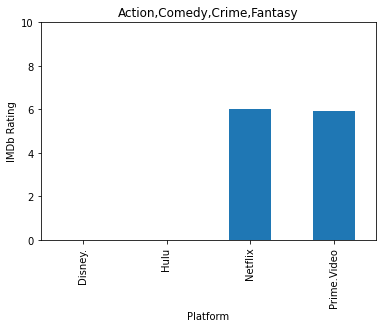

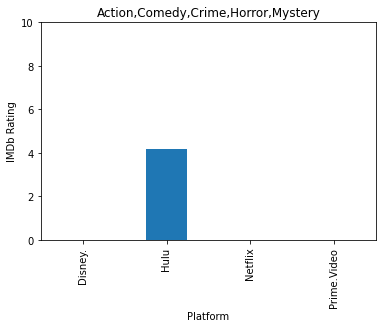

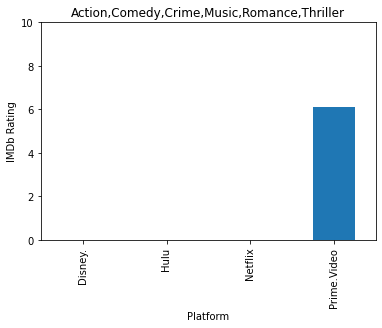

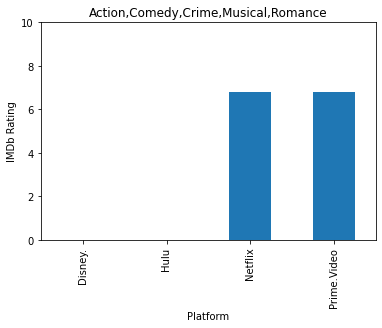

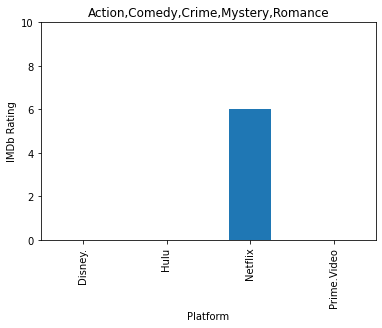

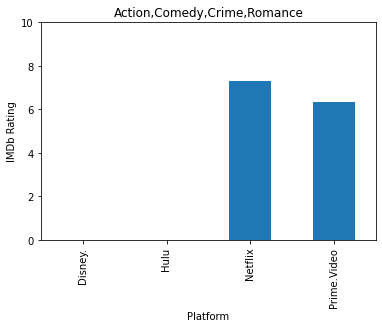

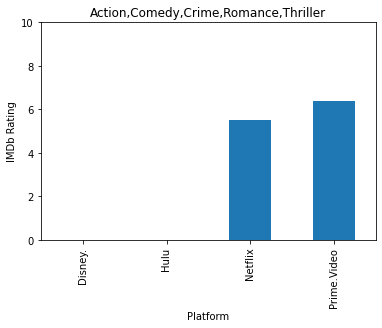

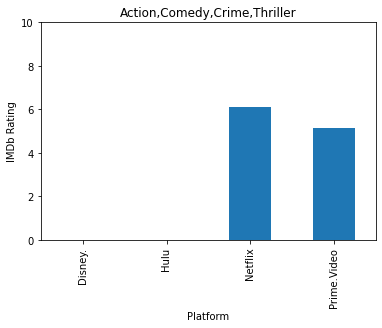

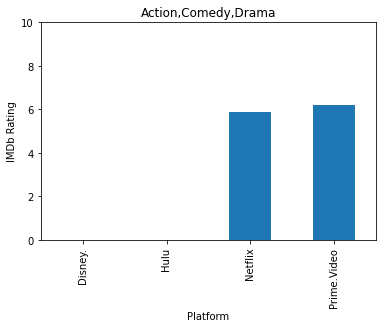

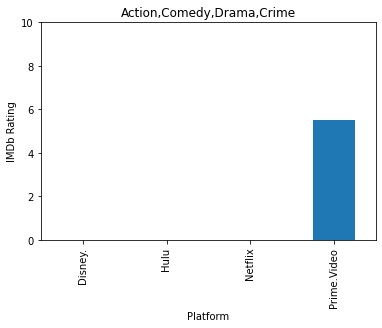

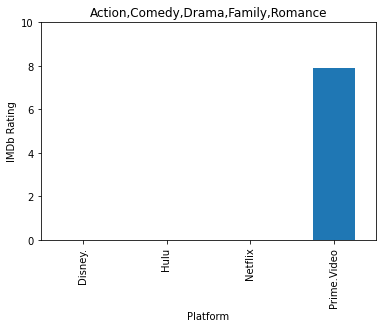

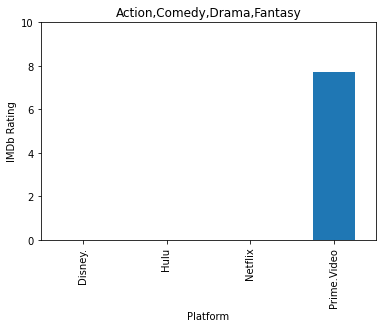

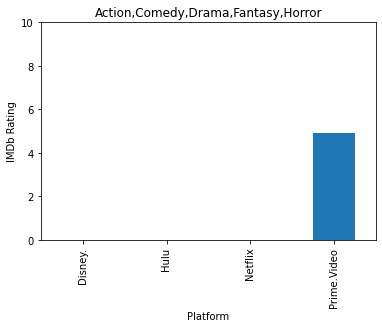

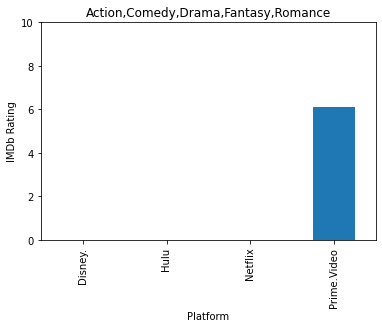

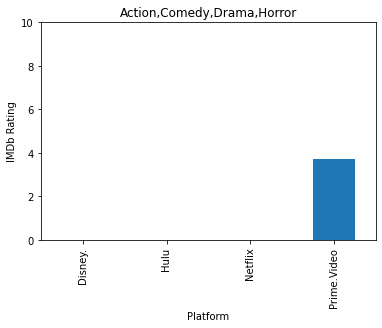

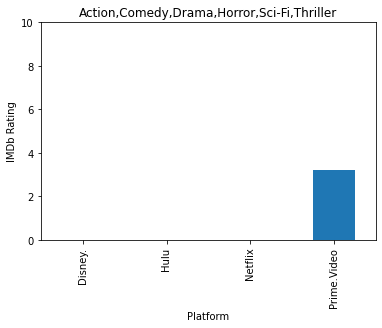

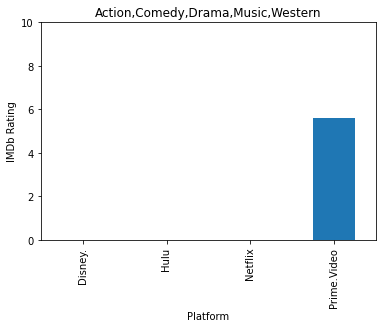

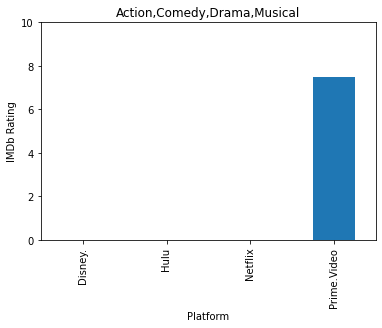

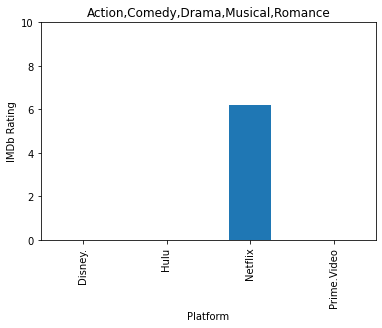

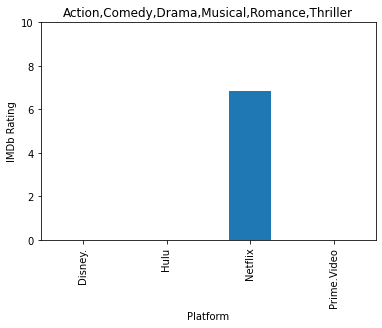

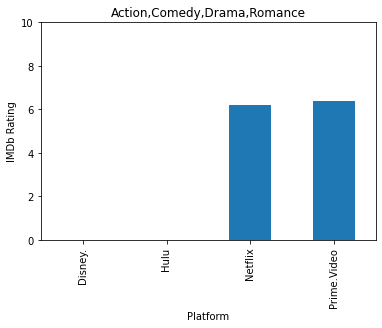

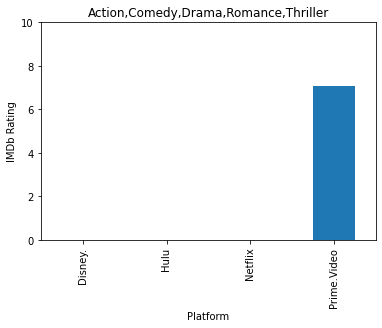

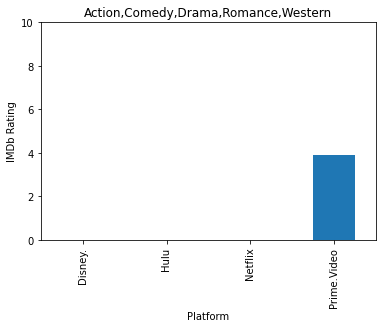

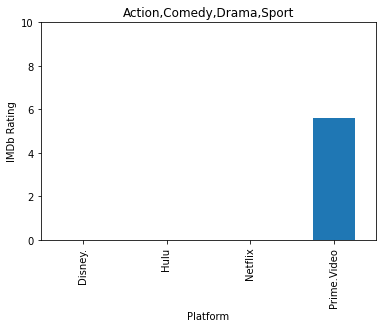

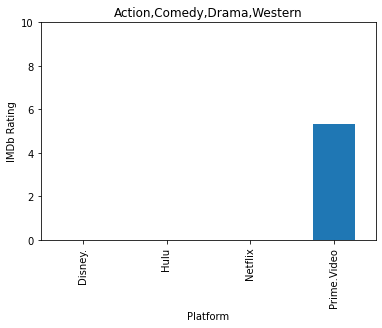

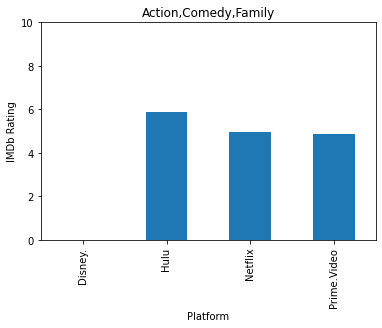

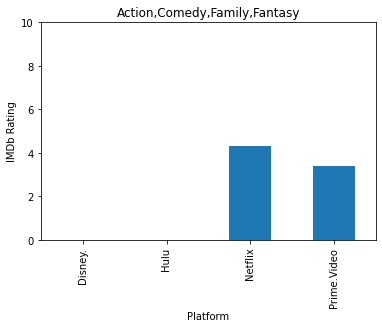

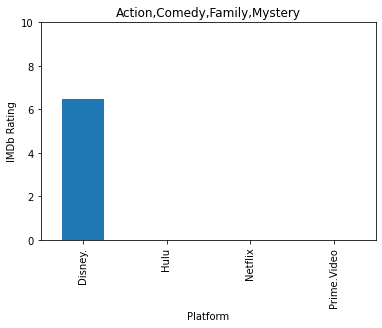

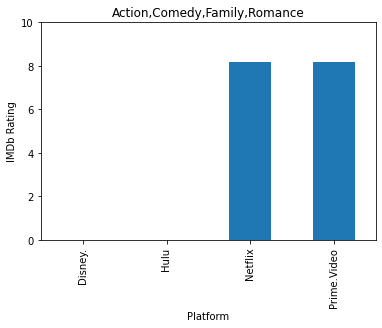

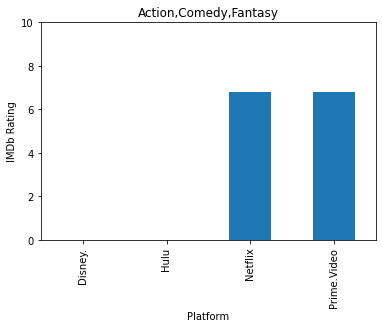

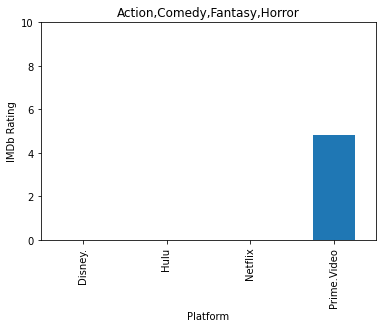

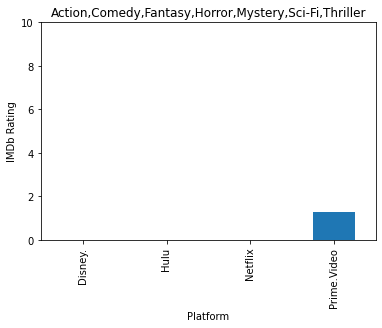

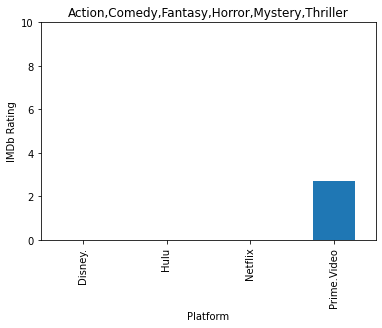

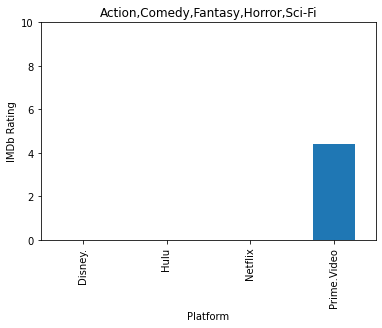

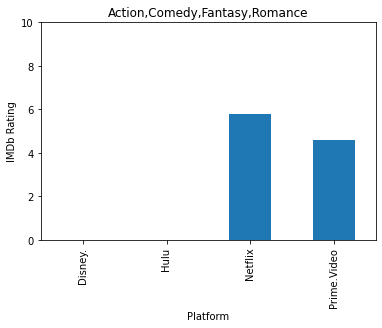

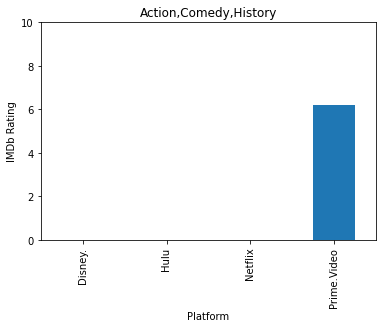

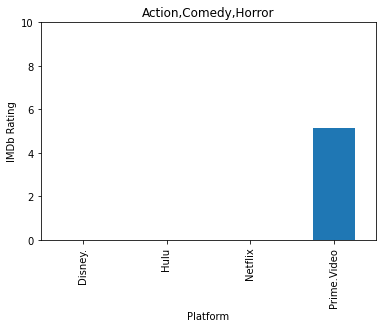

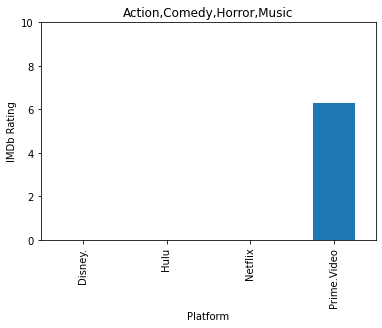

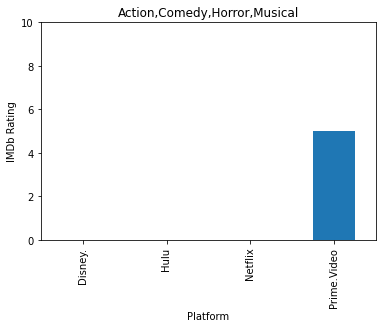

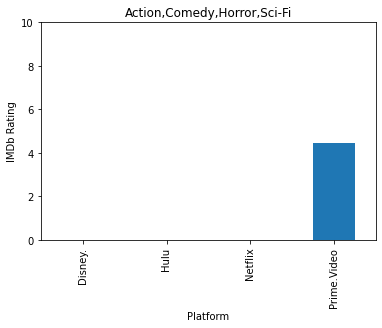

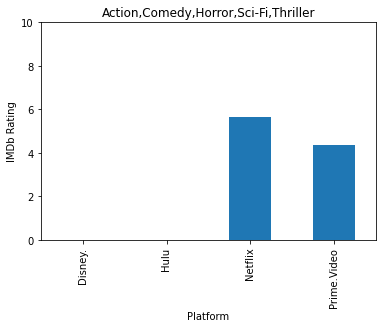

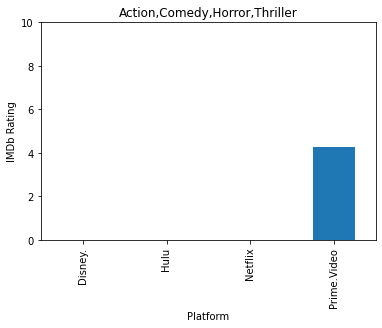

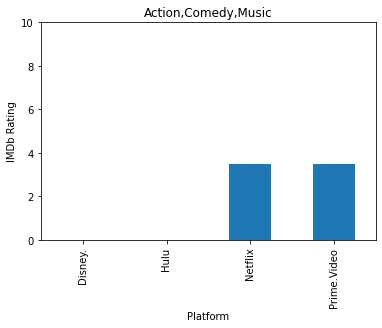

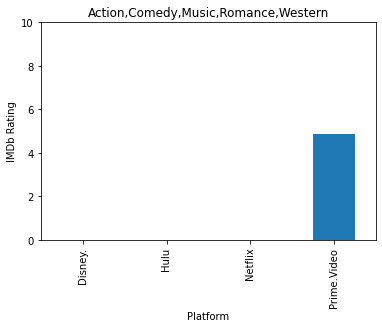

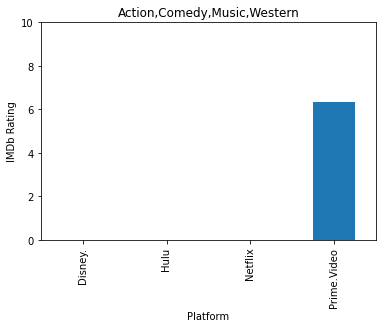

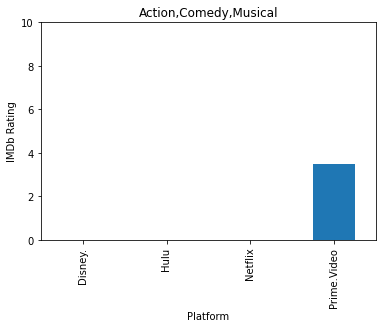

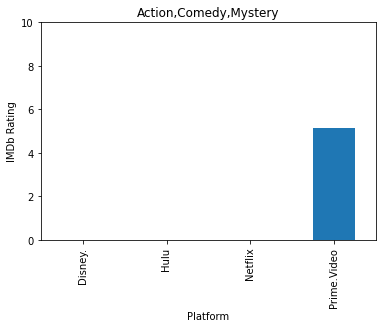

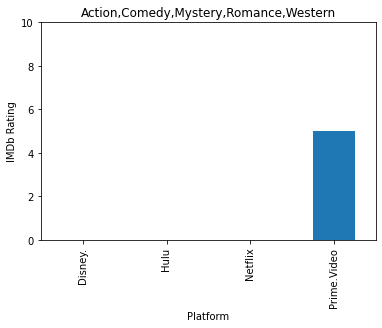

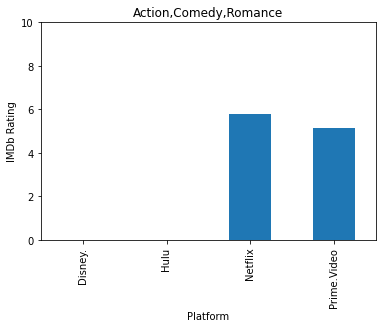

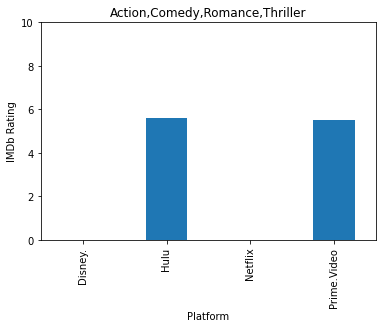

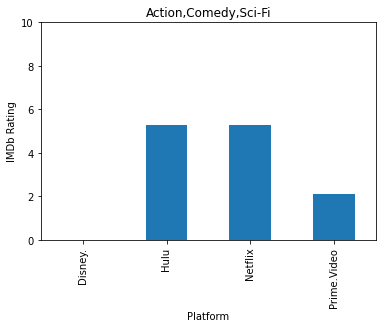

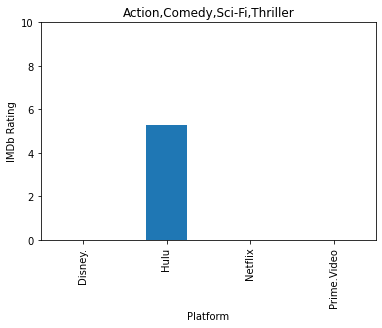

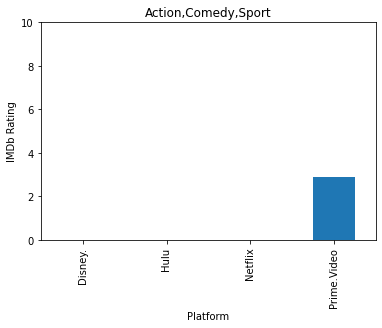

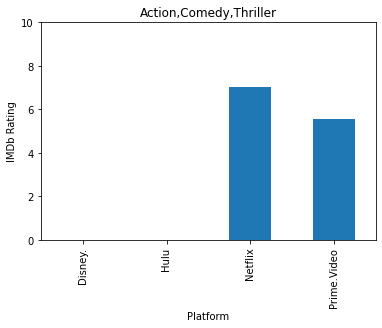

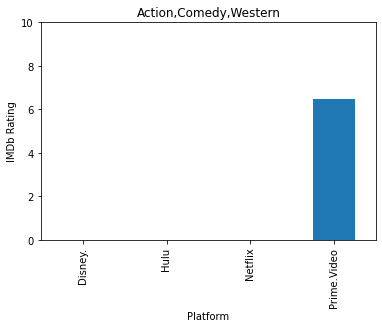

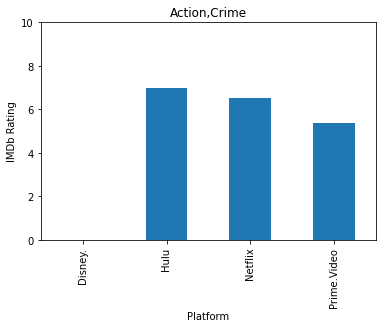

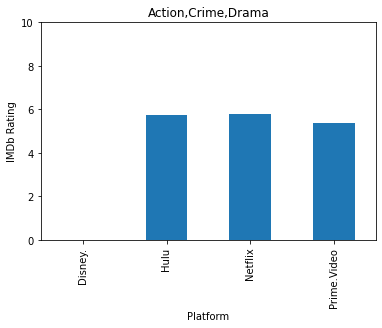

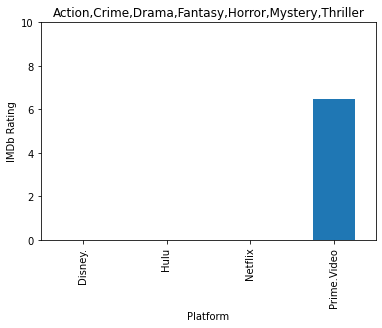

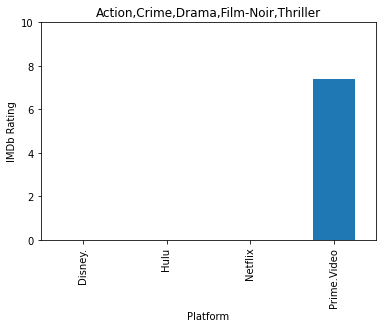

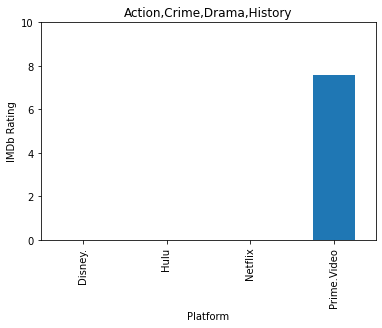

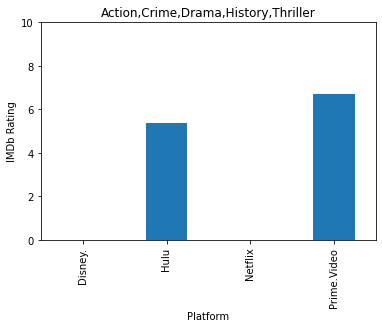

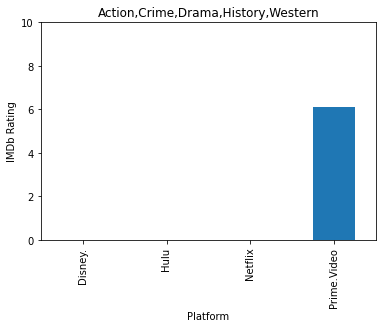

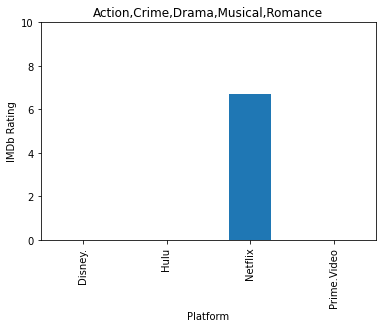

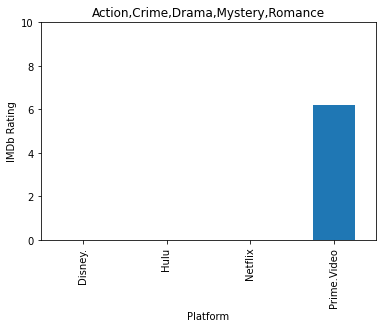

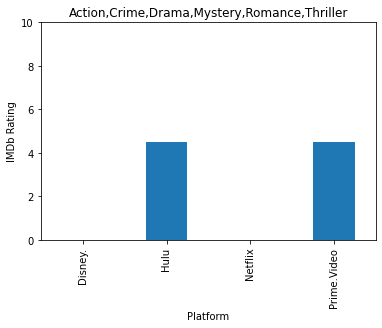

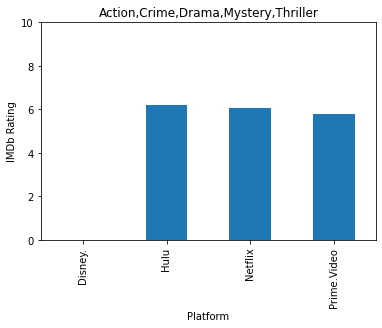

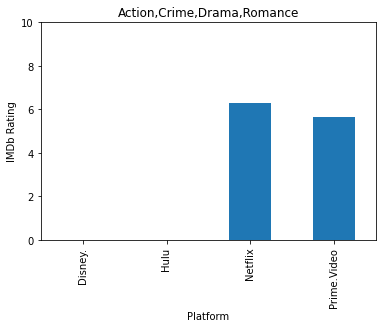

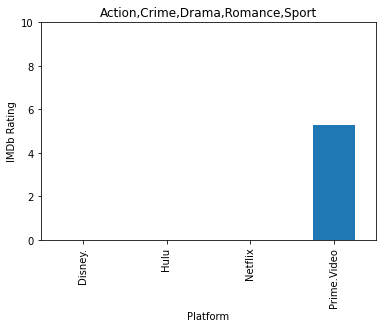

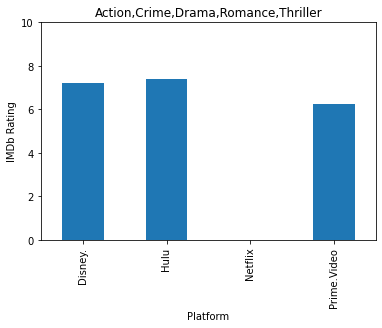

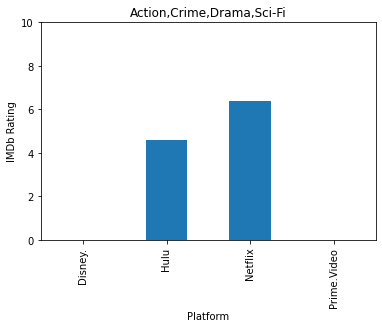

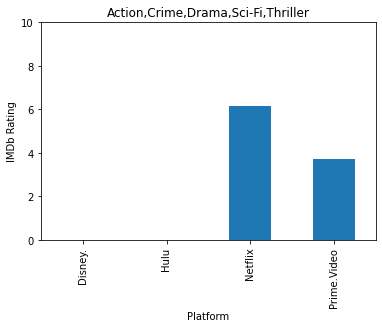

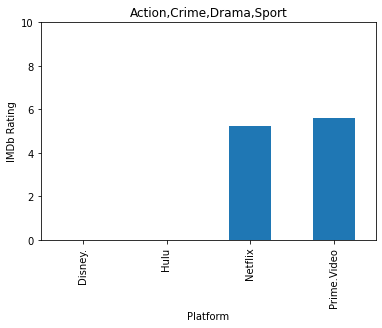

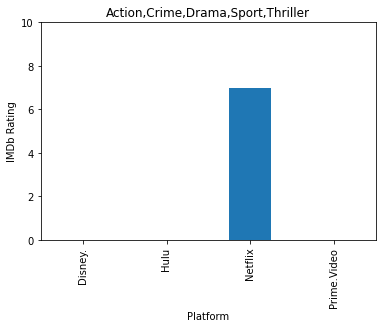

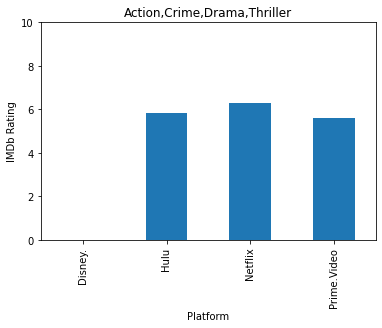

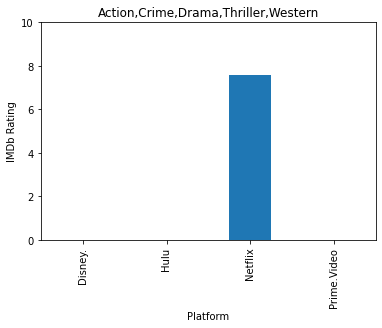

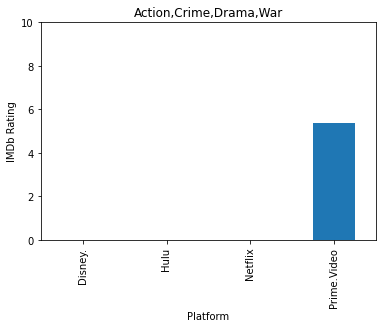

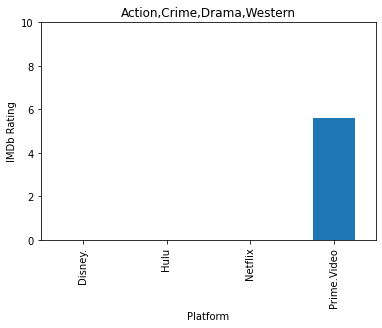

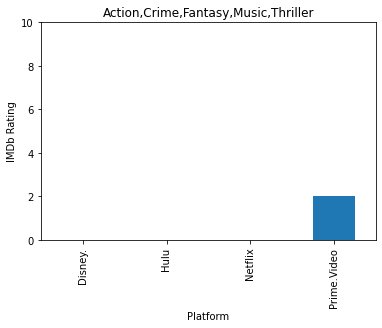

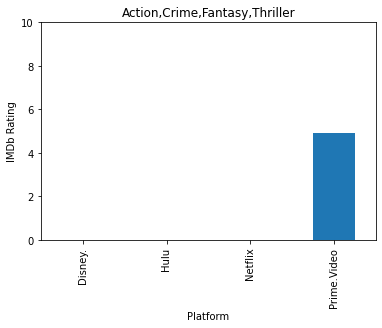

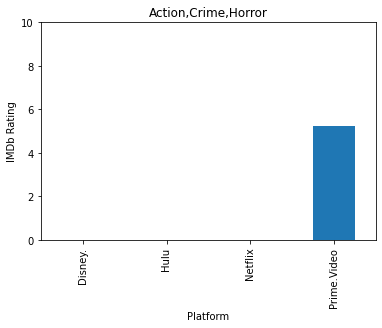

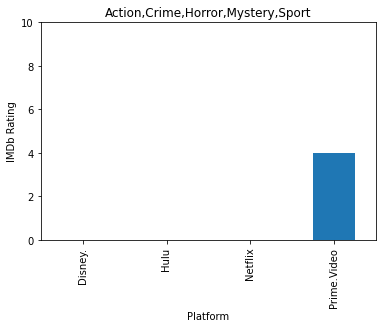

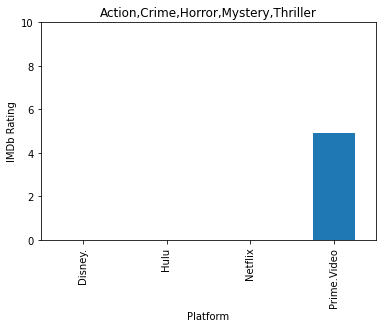

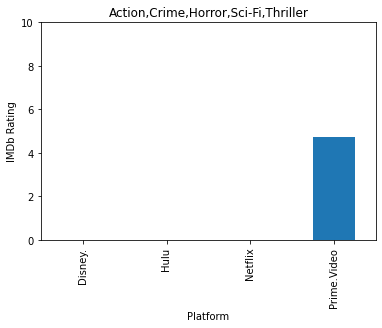

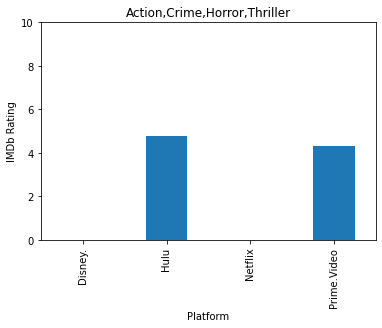

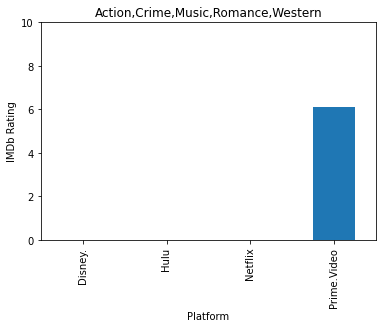

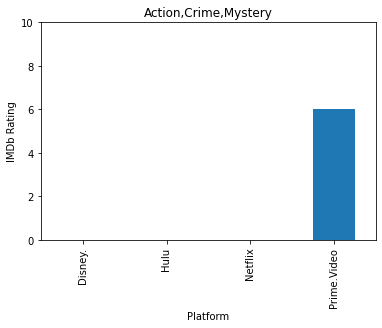

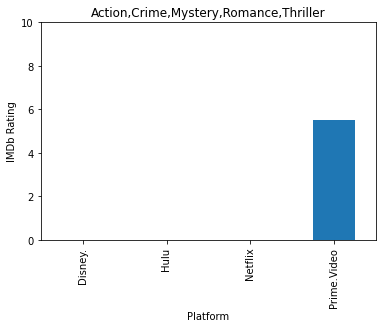

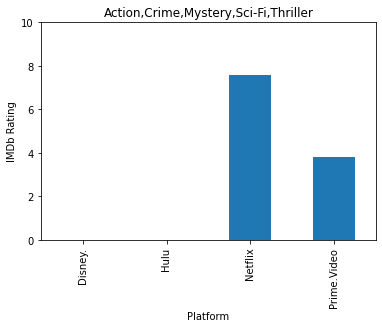

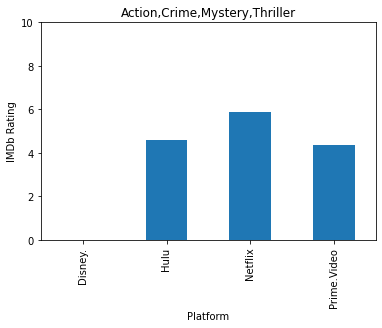

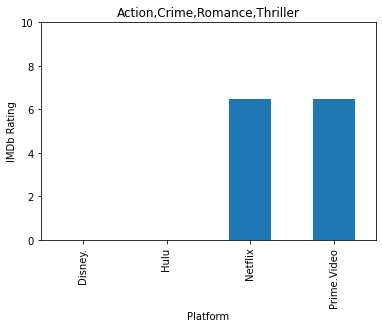

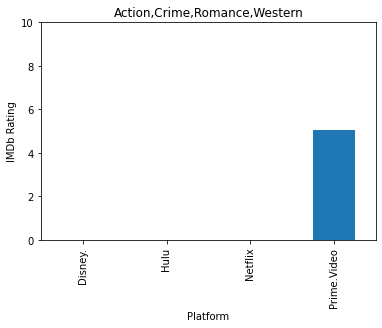

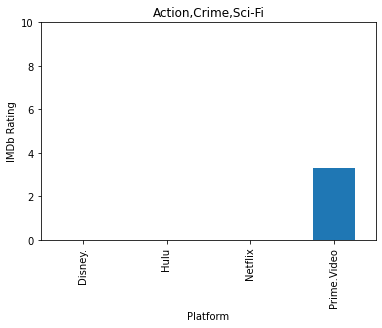

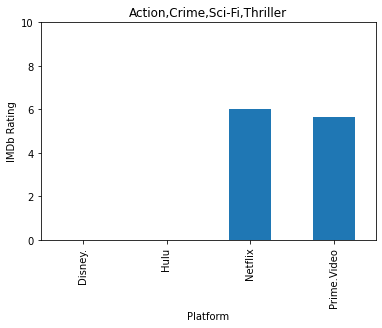

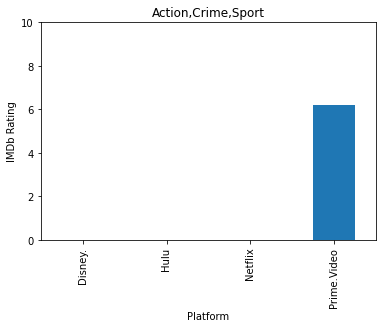

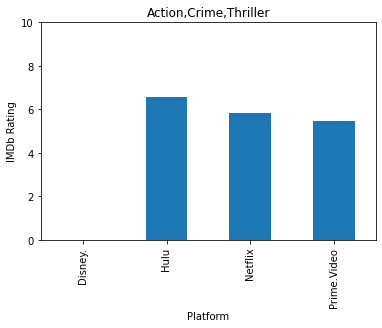

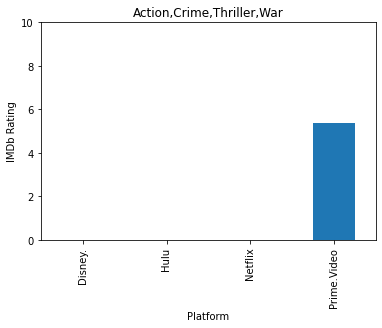

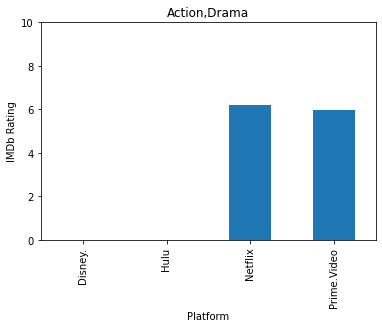

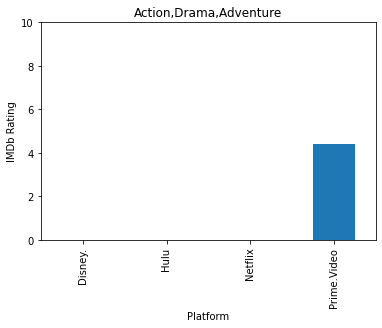

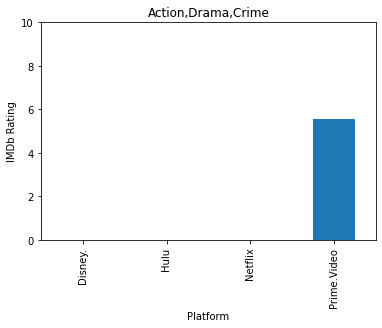

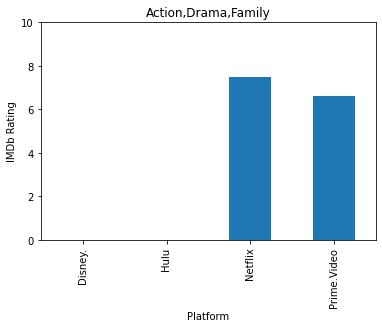

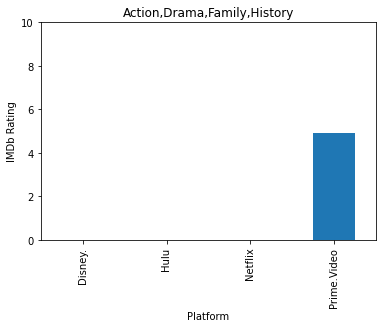

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [59]:
#To analyze what content resonates with the audience across different streaming platforms (Hulu, Netflix, Prime Video, Disney), 
#we can use the movie dataset and extract information such as movie ratings and genres.
# Create a new DataFrame with only the necessary columns
platforms = ["Hulu", "Netflix", "Prime.Video", "Disney."]
cols = ["Title", "IMDb", "Genres", "Year"]
platform_data = pd.DataFrame(columns=cols)

# Loop through each platform and extract the data
for platform in platforms:
    platform_movies = data[data[platform] == 1]
    platform_movies = platform_movies[cols]
    platform_movies["Platform"] = platform
    platform_data = pd.concat([platform_data, platform_movies])

# Group the data by genre and platform and calculate the mean IMDb rating
genre_data = platform_data.groupby(["Genres", "Platform"]).mean()["IMDb"].unstack()

# Plot a bar chart for each genre
for genre in genre_data.index:
    plot_data = genre_data.loc[genre]
    plot_data.plot(kind="bar")
    plt.title(genre)
    plt.xlabel("Platform")
    plt.ylabel("IMDb Rating")
    plt.ylim(0, 10)
    plt.show()

In [60]:
import plotly.express as px

In [61]:
import plotly.express as px
#Visualizes age group movie count using Plotly Express
fig = px.bar(data['Age'].value_counts(),
             x=data['Age'].value_counts().index,
             y=data['Age'].value_counts().values,
             labels={'x': 'Age Group', 'y': 'Count of Movies'},
             title="Number of Movies in specific age group in All services")
fig.show()


In [62]:
#Visualize Netflix movies count by age group using Plotly.
data_netflix = data[data['Netflix']==1]
fig = px.bar(data_netflix['Age'].value_counts(),
             x=data_netflix['Age'].value_counts().index,
             y=data_netflix['Age'].value_counts().values,
             labels={'x': 'Age Group', 'y': 'Count of Movies'},
             color_discrete_sequence=['blue'],
             title="Number of Movies in specific age group in Netflix")
fig.show()


In [63]:
#Bar plot of movie counts in Hulu by age group.
data_hulu = data[data['Hulu']==1]
fig = px.bar(data_hulu['Age'].value_counts(),
             x=data_hulu['Age'].value_counts().index,
             y=data_hulu['Age'].value_counts().values,
             labels={'x': 'Age Group', 'y': 'Count of Movies'},
             color_discrete_sequence=['red'],
             title="Number of Movies in specific age group in Hulu")
fig.show()


In [64]:
#using Plotly to visualize Prime Video movie counts.
data_prime = data[data['Prime.Video']==1]
fig = px.bar(data_prime['Age'].value_counts(),
             x=data_prime['Age'].value_counts().index,
             y=data_prime['Age'].value_counts().values,
             labels={'x': 'Age Group', 'y': 'Count of Movies'},
             color_discrete_sequence=['black'],
             title="Number of Movies in specific age group in Prime Video")
fig.show()


In [65]:
#The code uses a filtered dataset to create a bar chart showing the number of Disney movies in each age group.
data_disney = data[data['Disney.']==1]
fig = px.bar(data_disney['Age'].value_counts(),
             x=data_disney['Age'].value_counts().index,
             y=data_disney['Age'].value_counts().values,
             labels={'x': 'Age Group', 'y': 'Count of Movies'},
             color_discrete_sequence=['purple'],
             title="Number of Movies in specific age group in Disney")
fig.show()


In [66]:
#Top 10 movies according to Rotten Tomatoes Ratings
rating_sorted = data.sort_values('Rotten.Tomatoes',ascending =False)
top_10_movies_by_ratings = rating_sorted.groupby(['Rotten.Tomatoes','Title']).head(10)
new_list = top_10_movies_by_ratings.head(10)
fig = px.line(new_list,x="Title",y="Rotten.Tomatoes",title="Top 10 Movies",)
fig.show()

In [67]:
#Understand what content is available on all platforms.
#Filter the data to only include movies available on all platforms
platforms = ['Netflix', 'Hulu', 'Prime.Video', 'Disney.']
available_on_all = data[data[platforms].notnull().all(axis=1)]

#Print the number of movies available on all platforms
print(f"There are {len(available_on_all)} movies available on all platforms.")


There are 15819 movies available on all platforms.


In [68]:
#Movies available in more than 1 platforms

In [69]:
#filter data with Netflix and Prime Video, output empty dataframe.
#No rows in data have both Netflix and Prime Video.
temp_data = data[data['Netflix']==1]
temp_data = temp_data[temp_data['Prime.Video']==1]
temp_data

Unnamed: 0     X                           Title  Year  Age  IMDb  \
4              5     4  The Good, the Bad and the Ugly  1966   18   8.8   
6              7     6                     The Pianist  2002   18   8.5   
11            12    11                        3 Idiots  2009   13   8.4   
15            16    15    Once Upon a Time in the West  1968   13   8.5   
31            32    31                           Drive  2011   18   7.8   
...          ...   ...                             ...   ...  ...   ...   
3270        3435  3434                        Contract  2008   18   4.2   
3273        3439  3438                        Daffedar  2016   14   5.9   
3274        3440  3439                           Hisss  2010   14   2.8   
3275        3441  3440                   Coffee with D  2017   13   4.4   
3280        3446  3445                      Cappuccino  2017   14   3.8   

      Rotten.Tomatoes  Netflix  Hulu  Prime.Video  Disney.  Type  \
4                  97        1     0            1        0     0   
6                  95        1     0            1        0     0   
11                100        1     0            1        0     0   
15                 95        1     0            1        0     0   
31                 92        1     0            1        0     0   
...               ...      ...   ...          ...      ...   ...   
3270               65        1     0            1        0     0   
3273               65        1     0            1        0     0   
3274               65        1     0            1        0     0   
3275               17        1     0            1        0     0   
3280               65        1     0            1        0     0   

                 Directors                               Genres  \
4             Sergio Leone                              Western   
6           Roman Polanski            Biography,Drama,Music,War   
11         Rajkumar Hirani                         Comedy,Drama   
15            Sergio Leone                              Western   
31    Nicolas Winding Refn                          Crime,Drama   
...                    ...                                  ...   
3270       Ram Gopal Varma  Action,Crime,Drama,Mystery,Thriller   
3273     Johnson Esthappan                                Drama   
3274        Jennifer Lynch         Comedy,Drama,Horror,Thriller   
3275         Vishal Mishra                               Comedy   
3280             Jon Amiel                               Comedy   

                                   Country                    Language  \
4                 Italy,Spain,West Germany                     Italian   
6     United Kingdom,France,Poland,Germany      English,German,Russian   
11                                   India               Hindi,English   
15                     Italy,United States     Italian,English,Spanish   
31                           United States             English,Spanish   
...                                    ...                         ...   
3270                                 India  Hindi,Urdu,Marathi,English   
3273                                 India                   Malayalam   
3274                   India,United States               English,Hindi   
3275                                 India                         NaN   
3280          United Kingdom,United States                     English   

      Runtime  
4         161  
6         150  
11        170  
15        165  
31        100  
...       ...  
3270      117  
3273      153  
3274       98  
3275      123  
3280      112  

[336 rows x 17 columns]

In [70]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from wordcloud import WordCloud

In [72]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1
    Uninstalling pip-23.1:
      Successfully uninstalled pip-23.1
Note: you may need to restart the kernel to use updated packages.


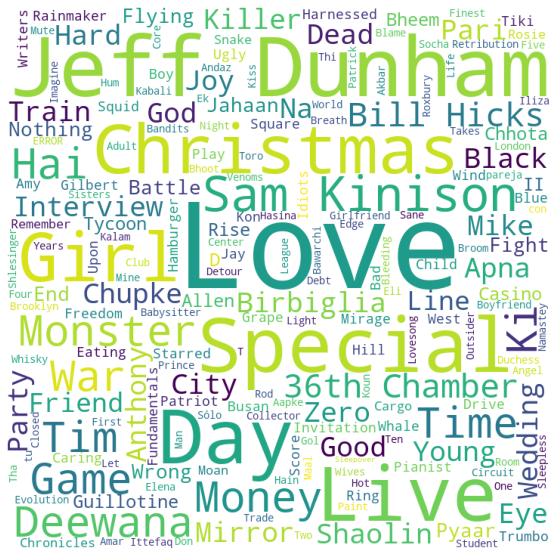

In [73]:
#Create and display word cloud from text data.
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 720,
                    height = 720
                        ).generate(' '.join(temp_data['Title']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [74]:
temp_data_nh = data[data['Netflix']==1]
temp_data_nh = temp_data_nh[temp_data_nh['Hulu']==1]
#list(temp_data_nh['Title'])

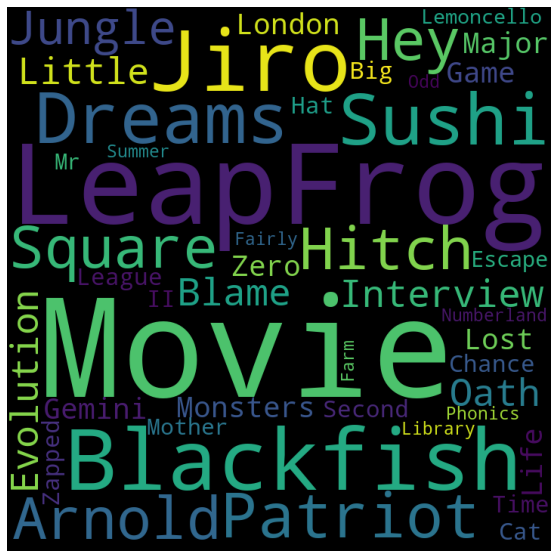

In [75]:
#Creates a word cloud plot from titles
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(temp_data_nh['Title']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()